# Probing GIN MDD

Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset_MDD

In [2]:
dataset = read_dataset_MDD()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1294], edge_attr=[1294, 1], y=[1])
['edge_attr', 'y', 'edge_index', 'x']
ValuesView({'x': tensor([[ 0.0000,  0.2857,  0.0804,  ...,  0.2032,  0.1674,  0.0906],
        [ 0.2857,  0.0000, -0.3860,  ...,  0.1637, -0.0359,  0.1674],
        [ 0.0804, -0.3860,  0.0000,  ..., -0.0175, -0.0309,  0.0296],
        ...,
        [ 0.2032,  0.1637, -0.0175,  ...,  0.0000,  0.2329, -0.1452],
        [ 0.1674, -0.0359, -0.0309,  ...,  0.2329,  0.0000,  0.0183],
        [ 0.0906,  0.1674,  0.0296,  ..., -0.1452,  0.0183,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 113, 113, 114],
        [ 10,  12,  14,  ..., 111, 112, 108]]), 'edge_attr': tensor([[0.7785],
        [0.6966],
        [0.5463],
        ...,
        [0.6415],
        [0.4745],
        [0.5401]]), 'y': tensor([0])})


1604

In [4]:
#set the seed
import torch
torch.manual_seed(37)

DATASET = "FC_MDD"

MODEL = "GIN"
from models.models_FC import GIN_framework as framework # import the model
gnn = framework(dataset)

# MODELbis = "GINbis"
# from models.models_FC import GIN_framework_bis as framework # import the model
# gnnbis = framework(dataset)

# MODELtri = "GINtri"
# from models.models_FC import GIN_framework_tri as framework # import the model
# gnntri = framework(dataset)

# MODEL2 = "GIN2"
# from models.models_FC import GIN_framework2 as framework2 # import the model
# gnn2 = framework2(dataset)

# MODEL3 = "GIN3"
# from models.models_FC import GIN_framework3 as framework3 # import the model
# gnn3 = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
# gnn.iterate()

In [6]:
# gnnbis.iterate()

In [7]:
# gnntri.iterate()

In [8]:
# gnn2.iterate()

In [9]:
# gnn3.iterate()

In [10]:
# gnn3.cross_validate()

In [11]:
#gnn.train()

In [12]:
# gnntri.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

In [13]:
# save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnn2.save_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

In [15]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt")#, map_location='cpu')

# gnn2.load_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")
# gnnbis.load_model(path="models/GINbis_best_model.pth")
# gnntri.load_model(path="models/"+DATASET+"_"+MODELtri+"server.pt")
#gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server_iterate.pt")
#gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server_iterate.pt")

In [16]:
gnn.evaluate()

Test Loss: 1.661, Train Acc: 0.978 Test Acc: 0.691


In [17]:
# gnntri.evaluate()

In [18]:
# gnn3.evaluate()

In [19]:
# from torch_geometric.data import DataLoader
# test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)

# gnn3.evaluate2(test_loader)

### Properties

In [ ]:
import pickle as pkl
import networkx as nx

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def calculate_small_world(G):
    if nx.is_connected(G):
        return nx.algorithms.smallworld.sigma(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the small world coefficient of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.algorithms.smallworld.sigma(largest_component)
    
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        assortativity = nx.degree_assortativity_coefficient(G)
        small_world = compute_swi(G)
            
        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component, assortativity, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

# Save the properties to files
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "wb") as f:
    pkl.dump(train_properties, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "wb") as f:
    pkl.dump(test_properties, f)

In [ ]:
# print(len(train_properties))
# train_properties[0:5]

In [20]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "rb") as f:
    test_properties = pkl.load(f)

### Features

In [17]:
train_features, test_features = gnn.evaluate_with_features2()

In [18]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1523, 81)

In [21]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
# train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7', 'x8']

### Diagnostic classifier

In [ ]:

#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    # Flatten the embeddings before determining the input size
    train_embedding_flat = train_embedding.view(train_embedding.size(0), -1)
    test_embedding_flat = test_embedding.view(test_embedding.size(0), -1)
    #print the shapes
    print(train_embedding_flat.shape)
    print(test_embedding_flat.shape)
    input_size = train_embedding_flat.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 2000000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding_flat).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding_flat).squeeze().cpu().numpy()
            test_pred = model(test_embedding_flat).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_full_embedding.pkl", "wb") as f:
    pkl.dump(results, f)

torch.Size([1523, 14848])
torch.Size([81, 14848])
Epoch [1000/2000000], Property: num_nodes, Loss: 13.1149
Epoch [2000/2000000], Property: num_nodes, Loss: 4.6198
Epoch [3000/2000000], Property: num_nodes, Loss: 1.7315
Epoch [4000/2000000], Property: num_nodes, Loss: 0.5770
Epoch [5000/2000000], Property: num_nodes, Loss: 0.1578
Epoch [6000/2000000], Property: num_nodes, Loss: 0.0415
Epoch [7000/2000000], Property: num_nodes, Loss: 0.0177
Epoch [8000/2000000], Property: num_nodes, Loss: 0.0109
Epoch [9000/2000000], Property: num_nodes, Loss: 0.0065
Epoch [10000/2000000], Property: num_nodes, Loss: 0.3116
Epoch [11000/2000000], Property: num_nodes, Loss: 0.0028
Epoch [12000/2000000], Property: num_nodes, Loss: 0.0018
Epoch [13000/2000000], Property: num_nodes, Loss: 0.0012
Epoch [14000/2000000], Property: num_nodes, Loss: 0.0010
Epoch [15000/2000000], Property: num_nodes, Loss: 0.0006
Epoch [16000/2000000], Property: num_nodes, Loss: 0.0005
Epoch [17000/2000000], Property: num_nodes, Lo

Epoch [13000/2000000], Property: num_cliques, Loss: 0.0191
Epoch [14000/2000000], Property: num_cliques, Loss: 0.0119
Epoch [15000/2000000], Property: num_cliques, Loss: 0.0076
Epoch [16000/2000000], Property: num_cliques, Loss: 0.0048
Epoch [17000/2000000], Property: num_cliques, Loss: 0.0327
Epoch [18000/2000000], Property: num_cliques, Loss: 0.0020
Epoch [19000/2000000], Property: num_cliques, Loss: 0.0018
Epoch [20000/2000000], Property: num_cliques, Loss: 0.0009
Epoch [21000/2000000], Property: num_cliques, Loss: 0.0006
Epoch [22000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [23000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [24000/2000000], Property: num_cliques, Loss: 0.0002
Epoch [25000/2000000], Property: num_cliques, Loss: 0.0008
Epoch [26000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [27000/2000000], Property: num_cliques, Loss: 0.0002
Epoch [28000/2000000], Property: num_cliques, Loss: 0.0000
Epoch [29000/2000000], Property: num_cliques, Loss: 0.00

In [15]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results_full_embedding.pkl", "rb") as f:
    results = pkl.load(f)

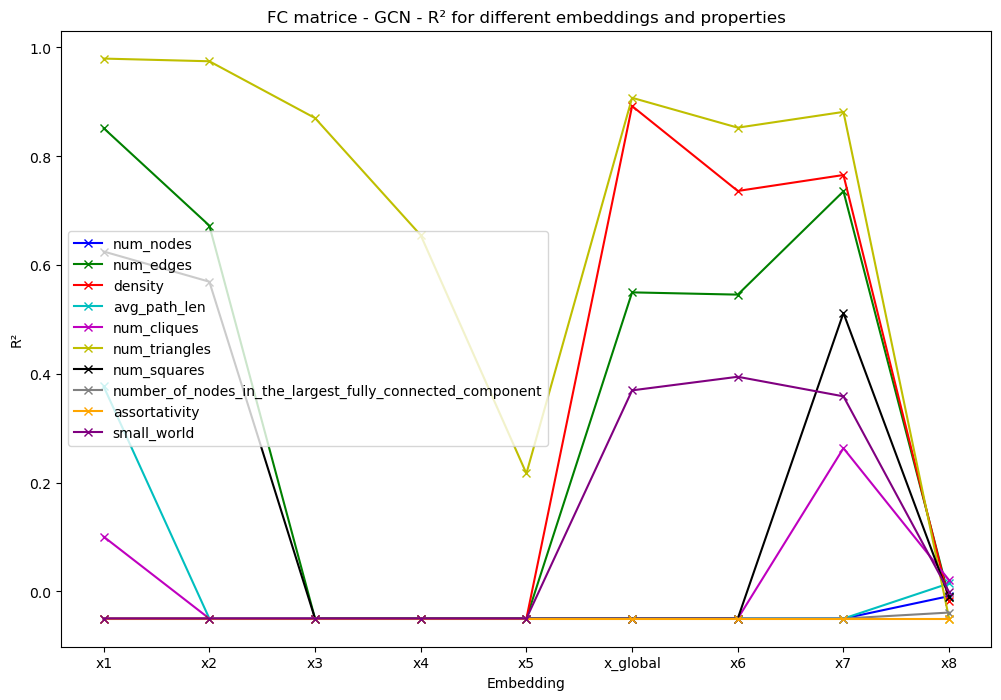

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']


plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2_plot_full_embedding.png")


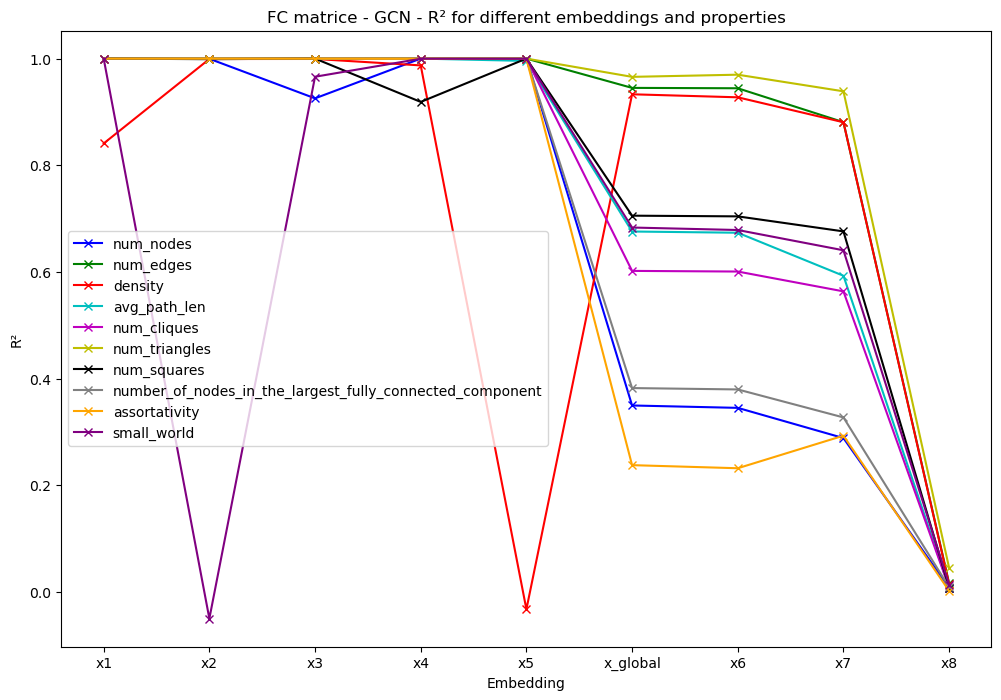

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']


plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"train_R2_plot_full_embedding.png")

# Test with more properties

In [22]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
   
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi


def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        small_world_index = compute_swi(G)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient, 
            betweenness_cent,
            pagerank_cent,
            avg_clustering,
            small_world_index           

        ))
    return properties


train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)



Betweenness Centralization: 0.001724022477030078
PageRank Centralization: 0.011393522233220854
Average Clustering Coefficient: 0.46590185426058695
Transitivity: 0.5531747591900924
Betweenness Centralization: 0.0017261983853566708
PageRank Centralization: 0.008926832657320428
Average Clustering Coefficient: 0.5182009816568728
Transitivity: 0.5797223390828776
Betweenness Centralization: 0.003333083015572392
PageRank Centralization: 0.015313849504207902
Average Clustering Coefficient: 0.4704590487485227
Transitivity: 0.4714022140221402
Betweenness Centralization: 0.0010671877568257148
PageRank Centralization: 0.005223720319742302
Average Clustering Coefficient: 0.5604119583322708
Transitivity: 0.5464108308171812
Betweenness Centralization: 0.0022241433151757965
PageRank Centralization: 0.010110693464664746
Average Clustering Coefficient: 0.5817108880061148
Transitivity: 0.6164350158497928
Betweenness Centralization: 0.0008253715900658974
PageRank Centralization: 0.008937849000785932
Avera

Betweenness Centralization: 0.001078428822044226
PageRank Centralization: 0.009063561996750147
Average Clustering Coefficient: 0.5532543094005744
Transitivity: 0.5523364485981308
Betweenness Centralization: 0.001653614405354768
PageRank Centralization: 0.007032983882622251
Average Clustering Coefficient: 0.5508670653133515
Transitivity: 0.5519043035886154
Betweenness Centralization: 0.0015445362029709983
PageRank Centralization: 0.009370313296131976
Average Clustering Coefficient: 0.503380722715761
Transitivity: 0.5818673883626523
Betweenness Centralization: 0.0017807546976311142
PageRank Centralization: 0.009501326946814097
Average Clustering Coefficient: 0.4149566523606274
Transitivity: 0.4692404834926935
Betweenness Centralization: 0.0020229469275225478
PageRank Centralization: 0.007260008922385329
Average Clustering Coefficient: 0.5209656672192529
Transitivity: 0.5912332579579057
Betweenness Centralization: 0.0011742922774086507
PageRank Centralization: 0.0074486415980829805
Averag

Betweenness Centralization: 0.0010914474082738801
PageRank Centralization: 0.009126440311914046
Average Clustering Coefficient: 0.4677095114948748
Transitivity: 0.47178947368421054
Betweenness Centralization: 0.0012685107404340795
PageRank Centralization: 0.0068168393209759245
Average Clustering Coefficient: 0.5186194311514003
Transitivity: 0.5033734232912878
Betweenness Centralization: 0.0009491348124185677
PageRank Centralization: 0.006918374381046993
Average Clustering Coefficient: 0.48102698538622907
Transitivity: 0.4596774193548387
Betweenness Centralization: 0.0012768517676512569
PageRank Centralization: 0.012649930264661288
Average Clustering Coefficient: 0.5059288865619318
Transitivity: 0.4874008810572687
Betweenness Centralization: 0.0009213240690828585
PageRank Centralization: 0.010800485001101505
Average Clustering Coefficient: 0.4979806981681155
Transitivity: 0.5099398139704542
Betweenness Centralization: 0.002157265795254701
PageRank Centralization: 0.008179831460735679
Av

Betweenness Centralization: 0.0015906975639688602
PageRank Centralization: 0.009703507119299034
Average Clustering Coefficient: 0.4380468922164223
Transitivity: 0.4976958525345622
Betweenness Centralization: 0.0018844204684231544
PageRank Centralization: 0.009696681730930105
Average Clustering Coefficient: 0.4778778278778279
Transitivity: 0.46482213438735176
Betweenness Centralization: 0.0014654430088957636
PageRank Centralization: 0.007175270605341496
Average Clustering Coefficient: 0.5313838022553865
Transitivity: 0.5791930643547849
Betweenness Centralization: 0.0023295450822815385
PageRank Centralization: 0.007339947681879866
Average Clustering Coefficient: 0.4882268866324595
Transitivity: 0.49248774315989247
Betweenness Centralization: 0.0014804367483372718
PageRank Centralization: 0.006898064630729408
Average Clustering Coefficient: 0.4274698304110067
Transitivity: 0.4977714748784441
Betweenness Centralization: 0.0013696492907756873
PageRank Centralization: 0.006859673356675671
Av

Betweenness Centralization: 0.0007891668184026563
PageRank Centralization: 0.006072713927971934
Average Clustering Coefficient: 0.5060378182722585
Transitivity: 0.5087798799139005
Betweenness Centralization: 0.0023663928569996754
PageRank Centralization: 0.010479937220992767
Average Clustering Coefficient: 0.40516212087419506
Transitivity: 0.4718985606579849
Betweenness Centralization: 0.0007162682787337847
PageRank Centralization: 0.008947032081459878
Average Clustering Coefficient: 0.41375953274526434
Transitivity: 0.4521642619311876
Betweenness Centralization: 0.0011434019801239968
PageRank Centralization: 0.009548973385956892
Average Clustering Coefficient: 0.41876977368463436
Transitivity: 0.4487510766580534
Betweenness Centralization: 0.0015447532700325556
PageRank Centralization: 0.01063250198665506
Average Clustering Coefficient: 0.46562118234926914
Transitivity: 0.4886090278760436
Betweenness Centralization: 0.0010981793433088153
PageRank Centralization: 0.01043065988519064
Av

Betweenness Centralization: 0.001956965640076141
PageRank Centralization: 0.009370718026949021
Average Clustering Coefficient: 0.4986909248519155
Transitivity: 0.64555633310007
Betweenness Centralization: 0.001097834255933805
PageRank Centralization: 0.012307833521830803
Average Clustering Coefficient: 0.5119456513881813
Transitivity: 0.4922660479505027
Betweenness Centralization: 0.0009281198376291561
PageRank Centralization: 0.00724683769501419
Average Clustering Coefficient: 0.5122449653285183
Transitivity: 0.5569395017793595
Betweenness Centralization: 0.0022617902301814673
PageRank Centralization: 0.009629642317162127
Average Clustering Coefficient: 0.45033410327527973
Transitivity: 0.6300099370652534
Betweenness Centralization: 0.0020996979398163096
PageRank Centralization: 0.008304006896864726
Average Clustering Coefficient: 0.41661745334311706
Transitivity: 0.4287369640787949
Betweenness Centralization: 0.0012498034543931896
PageRank Centralization: 0.008991904382429276
Average

Betweenness Centralization: 0.0008829538383133426
PageRank Centralization: 0.00836495741338483
Average Clustering Coefficient: 0.4698271831679628
Transitivity: 0.49511320054435237
Betweenness Centralization: 0.0010260678073167448
PageRank Centralization: 0.008074045819507466
Average Clustering Coefficient: 0.46228060562443585
Transitivity: 0.483364009627637
Betweenness Centralization: 0.0014427403242156802
PageRank Centralization: 0.007157924869643705
Average Clustering Coefficient: 0.4944544344544343
Transitivity: 0.504791620236238
Betweenness Centralization: 0.0006950915804825128
PageRank Centralization: 0.0058676434201165705
Average Clustering Coefficient: 0.4511632887087187
Transitivity: 0.45184036102101255
Betweenness Centralization: 0.00268997163384751
PageRank Centralization: 0.009619717764229523
Average Clustering Coefficient: 0.47187694034280314
Transitivity: 0.5198438516590761
Betweenness Centralization: 0.0008332279148941432
PageRank Centralization: 0.0072472085940706536
Ave

PageRank Centralization: 0.008900740247992733
Average Clustering Coefficient: 0.4329815007833583
Transitivity: 0.44060283687943264
Betweenness Centralization: 0.0020472072762164114
PageRank Centralization: 0.010465319250954551
Average Clustering Coefficient: 0.506670796101707
Transitivity: 0.5115537848605578
Betweenness Centralization: 0.0016757930327549045
PageRank Centralization: 0.009793978999732816
Average Clustering Coefficient: 0.48137004758318097
Transitivity: 0.5523465703971119
Betweenness Centralization: 0.0014055379802366055
PageRank Centralization: 0.005585101263801825
Average Clustering Coefficient: 0.5240769477785061
Transitivity: 0.5414705404966726
Betweenness Centralization: 0.0024985181175632876
PageRank Centralization: 0.007848103983640765
Average Clustering Coefficient: 0.46933098209987806
Transitivity: 0.49395699262282217
Betweenness Centralization: 0.0008210593645557531
PageRank Centralization: 0.007822104940505191
Average Clustering Coefficient: 0.48953160246672156

Betweenness Centralization: 0.001708087239873012
PageRank Centralization: 0.008369149757416825
Average Clustering Coefficient: 0.49527427717172634
Transitivity: 0.49718736477715275
Betweenness Centralization: 0.0012913283270453626
PageRank Centralization: 0.007788488267137701
Average Clustering Coefficient: 0.45667479437950037
Transitivity: 0.49178910976663787
Betweenness Centralization: 0.0007374233880125527
PageRank Centralization: 0.006399117984295209
Average Clustering Coefficient: 0.5512808291478776
Transitivity: 0.5576146788990826
Betweenness Centralization: 0.001516910910773752
PageRank Centralization: 0.007526350559757753
Average Clustering Coefficient: 0.5066604959928422
Transitivity: 0.4933936022253129
Betweenness Centralization: 0.0023846473295612495
PageRank Centralization: 0.008042888596630106
Average Clustering Coefficient: 0.3866151866151865
Transitivity: 0.45572705117790413
Betweenness Centralization: 0.0016016469382373227
PageRank Centralization: 0.0053399077686798494


Betweenness Centralization: 0.001089625140458651
PageRank Centralization: 0.008186316615204109
Average Clustering Coefficient: 0.49949479171312505
Transitivity: 0.48948335715744334
Betweenness Centralization: 0.0018140897768610291
PageRank Centralization: 0.009929816608945105
Average Clustering Coefficient: 0.5092522923792275
Transitivity: 0.5586242834809797
Betweenness Centralization: 0.0009839193475925736
PageRank Centralization: 0.007014520844424768
Average Clustering Coefficient: 0.44457057963249913
Transitivity: 0.4331011289935143
Betweenness Centralization: 0.0012345570286955128
PageRank Centralization: 0.012827217351017817
Average Clustering Coefficient: 0.4240001786117657
Transitivity: 0.4571134020618557
Betweenness Centralization: 0.001166007175048415
PageRank Centralization: 0.00989421068041138
Average Clustering Coefficient: 0.45597644833192497
Transitivity: 0.4685908319185059
Betweenness Centralization: 0.002702588734957143
PageRank Centralization: 0.0067912353451892215
Ave

Betweenness Centralization: 0.0013391404756897631
PageRank Centralization: 0.007961190188778342
Average Clustering Coefficient: 0.4786804655218606
Transitivity: 0.5067311737484224
Betweenness Centralization: 0.001566902107207433
PageRank Centralization: 0.00874906305307677
Average Clustering Coefficient: 0.45549237469409354
Transitivity: 0.5390577197634101
Betweenness Centralization: 0.001684508315839681
PageRank Centralization: 0.00866019250381122
Average Clustering Coefficient: 0.5434199922319676
Transitivity: 0.5371267605633803
Betweenness Centralization: 0.0009217250623534495
PageRank Centralization: 0.007273530727523175
Average Clustering Coefficient: 0.5320536776785756
Transitivity: 0.5588415756534544
Betweenness Centralization: 0.0009380664996812389
PageRank Centralization: 0.009591047000934662
Average Clustering Coefficient: 0.4764856165772947
Transitivity: 0.4833555259653795
Betweenness Centralization: 0.0023251061920560967
PageRank Centralization: 0.009377143575738656
Average

Betweenness Centralization: 0.0010841036632285282
PageRank Centralization: 0.006826822818730503
Average Clustering Coefficient: 0.45092524043416893
Transitivity: 0.4782154969997391
Betweenness Centralization: 0.0017870095563027309
PageRank Centralization: 0.00903026630248622
Average Clustering Coefficient: 0.42612668008539145
Transitivity: 0.46358409199808337
Betweenness Centralization: 0.0006240574048552188
PageRank Centralization: 0.006851604379178739
Average Clustering Coefficient: 0.5351081054828231
Transitivity: 0.5350520494469746
Betweenness Centralization: 0.002412446937560417
PageRank Centralization: 0.00993624123036884
Average Clustering Coefficient: 0.4509632121148336
Transitivity: 0.5024163568773234
Betweenness Centralization: 0.0010277611829384418
PageRank Centralization: 0.006075629868648715
Average Clustering Coefficient: 0.5200271217786161
Transitivity: 0.5268273199307683
Betweenness Centralization: 0.002136934699763706
PageRank Centralization: 0.009909813620584086
Avera

Betweenness Centralization: 0.0012016542664213862
PageRank Centralization: 0.006922965585693643
Average Clustering Coefficient: 0.49306370459213866
Transitivity: 0.48326482677627713
Betweenness Centralization: 0.0011679767377956766
PageRank Centralization: 0.008343135625347733
Average Clustering Coefficient: 0.469561135342035
Transitivity: 0.5191744526565333
Betweenness Centralization: 0.0010644681070949868
PageRank Centralization: 0.009420364562581742
Average Clustering Coefficient: 0.4581154594198073
Transitivity: 0.4515905947441217
Betweenness Centralization: 0.0008637057092722818
PageRank Centralization: 0.006350297562790588
Average Clustering Coefficient: 0.46823060668133104
Transitivity: 0.4661532225374949
Betweenness Centralization: 0.0014277243347639904
PageRank Centralization: 0.00873520663242639
Average Clustering Coefficient: 0.4841393986130831
Transitivity: 0.4960221376686268
Betweenness Centralization: 0.0010307431039437566
PageRank Centralization: 0.007000915566459421
Ave

Betweenness Centralization: 0.001191857343193623
PageRank Centralization: 0.005376709480526105
Average Clustering Coefficient: 0.5153020843816989
Transitivity: 0.5336995563067821
Betweenness Centralization: 0.0009615471066837511
PageRank Centralization: 0.008127993942743023
Average Clustering Coefficient: 0.471270833861984
Transitivity: 0.527098674521355
Betweenness Centralization: 0.0025449703411641327
PageRank Centralization: 0.006987889976064451
Average Clustering Coefficient: 0.4657409273386137
Transitivity: 0.5653935185185185
Betweenness Centralization: 0.0024045696700124184
PageRank Centralization: 0.007040974093566359
Average Clustering Coefficient: 0.46764093606198887
Transitivity: 0.5448785638859557
Betweenness Centralization: 0.0008174002329832467
PageRank Centralization: 0.007495394432106658
Average Clustering Coefficient: 0.5599020603717252
Transitivity: 0.5669572107765452
Betweenness Centralization: 0.0011550069024147246
PageRank Centralization: 0.005499582004745223
Averag

Betweenness Centralization: 0.0015110982766179358
PageRank Centralization: 0.0070998115451510625
Average Clustering Coefficient: 0.5237574271096209
Transitivity: 0.5391042322969456
Betweenness Centralization: 0.0009902261069931234
PageRank Centralization: 0.006460907168464174
Average Clustering Coefficient: 0.4935989748336985
Transitivity: 0.4786778208528872
Betweenness Centralization: 0.003195781813072342
PageRank Centralization: 0.006642052096345152
Average Clustering Coefficient: 0.5302217629677062
Transitivity: 0.5299929428369795
Betweenness Centralization: 0.001621968124778588
PageRank Centralization: 0.009143329673508031
Average Clustering Coefficient: 0.45403185073846103
Transitivity: 0.550351288056206
Betweenness Centralization: 0.0022497419797673705
PageRank Centralization: 0.010577522638770574
Average Clustering Coefficient: 0.48934060808153246
Transitivity: 0.523167649536647
Betweenness Centralization: 0.0010416665692794963
PageRank Centralization: 0.009456332602624153
Avera

Betweenness Centralization: 0.002116941481726184
PageRank Centralization: 0.0072330373147314634
Average Clustering Coefficient: 0.5151218721652157
Transitivity: 0.585112205801861
Betweenness Centralization: 0.0018561242984748805
PageRank Centralization: 0.010942678844818397
Average Clustering Coefficient: 0.43867446506216345
Transitivity: 0.4920222634508349
Betweenness Centralization: 0.0006069946365875745
PageRank Centralization: 0.004903384726992134
Average Clustering Coefficient: 0.5428276464862871
Transitivity: 0.5471782288645995
Betweenness Centralization: 0.002507149329083458
PageRank Centralization: 0.008273162445901639
Average Clustering Coefficient: 0.43336446825386554
Transitivity: 0.5583825533848251
Betweenness Centralization: 0.0013593724269257367
PageRank Centralization: 0.007005269015285417
Average Clustering Coefficient: 0.4763324333430826
Transitivity: 0.47253192783296166
Betweenness Centralization: 0.0013939390950445589
PageRank Centralization: 0.009756231258349225
Ave

Betweenness Centralization: 0.001812592328929885
PageRank Centralization: 0.007471097960126452
Average Clustering Coefficient: 0.5272060131071048
Transitivity: 0.5649918962722853
Betweenness Centralization: 0.0017019892314671786
PageRank Centralization: 0.006957379301402244
Average Clustering Coefficient: 0.38698179892870155
Transitivity: 0.4812886430198503
Betweenness Centralization: 0.0013785406438290271
PageRank Centralization: 0.006801373961878947
Average Clustering Coefficient: 0.5435197363858111
Transitivity: 0.5675603693181818
Betweenness Centralization: 0.0015731598239650331
PageRank Centralization: 0.009941283920593666
Average Clustering Coefficient: 0.49643572801467545
Transitivity: 0.49619250685348765
Betweenness Centralization: 0.0016856775824563843
PageRank Centralization: 0.00908184356799375
Average Clustering Coefficient: 0.5344447553895805
Transitivity: 0.5570987654320988
Betweenness Centralization: 0.0018756753359639214
PageRank Centralization: 0.010505896463184783
Ave

Betweenness Centralization: 0.0014678513129762784
PageRank Centralization: 0.007967719551717245
Average Clustering Coefficient: 0.484033131109912
Transitivity: 0.5120593692022264
Betweenness Centralization: 0.0025823430691681217
PageRank Centralization: 0.00784974941545386
Average Clustering Coefficient: 0.57865768478366
Transitivity: 0.5683367921731396
Betweenness Centralization: 0.0009969462305244746
PageRank Centralization: 0.006999436164925033
Average Clustering Coefficient: 0.47029391603695037
Transitivity: 0.4801123069723912
Betweenness Centralization: 0.0020113284584052458
PageRank Centralization: 0.007722101339860075
Average Clustering Coefficient: 0.541762365601375
Transitivity: 0.5532017332691381
Betweenness Centralization: 0.0017224415229168152
PageRank Centralization: 0.007477184725607194
Average Clustering Coefficient: 0.5367652983112666
Transitivity: 0.5690537084398977
Betweenness Centralization: 0.001767474025081739
PageRank Centralization: 0.007992790262564123
Average C

Betweenness Centralization: 0.0008706604075351105
PageRank Centralization: 0.006393215131077698
Average Clustering Coefficient: 0.4345070871157827
Transitivity: 0.44884169884169883
Betweenness Centralization: 0.0015673020272282032
PageRank Centralization: 0.00683764402128585
Average Clustering Coefficient: 0.5567290195906673
Transitivity: 0.5848591215254719
Betweenness Centralization: 0.0018092663734936701
PageRank Centralization: 0.009425451928850416
Average Clustering Coefficient: 0.4759899772030242
Transitivity: 0.4519230769230769
Betweenness Centralization: 0.0008871552674759707
PageRank Centralization: 0.009317613594688488
Average Clustering Coefficient: 0.4462734282178723
Transitivity: 0.41712204007285975
Betweenness Centralization: 0.0023783017721370047
PageRank Centralization: 0.014182614172205487
Average Clustering Coefficient: 0.39454244861692256
Transitivity: 0.48103245991396165
Betweenness Centralization: 0.0015876179105996013
PageRank Centralization: 0.006915600388367125
A

Betweenness Centralization: 0.0011082142162135633
PageRank Centralization: 0.00543737029843223
Average Clustering Coefficient: 0.4764466905347123
Transitivity: 0.5016987542468856
Betweenness Centralization: 0.0022854212799763613
PageRank Centralization: 0.008985143456031634
Average Clustering Coefficient: 0.5002251308566802
Transitivity: 0.5383297644539614
Betweenness Centralization: 0.0012422842317530553
PageRank Centralization: 0.009004200832168458
Average Clustering Coefficient: 0.4599351313747599
Transitivity: 0.46870554765291605
Betweenness Centralization: 0.0010573173186356215
PageRank Centralization: 0.007102343696651389
Average Clustering Coefficient: 0.4949720327981199
Transitivity: 0.49550994227068634
Betweenness Centralization: 0.0013461253659027526
PageRank Centralization: 0.006015980431239109
Average Clustering Coefficient: 0.4003437625176755
Transitivity: 0.4754262788365095
Betweenness Centralization: 0.001354877126168362
PageRank Centralization: 0.008362501892887843
Aver

Betweenness Centralization: 0.0022509873068899595
PageRank Centralization: 0.010121220468404453
Average Clustering Coefficient: 0.5084196032725444
Transitivity: 0.4820621043111245
Betweenness Centralization: 0.000991970376623131
PageRank Centralization: 0.005647094511573004
Average Clustering Coefficient: 0.521649293910957
Transitivity: 0.5152578990008102
Betweenness Centralization: 0.0008670465602860078
PageRank Centralization: 0.005941227468143847
Average Clustering Coefficient: 0.4533479563914347
Transitivity: 0.4344718030182685
Betweenness Centralization: 0.001541047670159139
PageRank Centralization: 0.008743786447024239
Average Clustering Coefficient: 0.452874685225894
Transitivity: 0.47846429062887025
Betweenness Centralization: 0.0023045341572853627
PageRank Centralization: 0.009897964412612087
Average Clustering Coefficient: 0.4031078581758352
Transitivity: 0.4947075208913649
Betweenness Centralization: 0.00202867613423292
PageRank Centralization: 0.009813737762754448
Average C

Betweenness Centralization: 0.0008214401621607704
PageRank Centralization: 0.008346457293427754
Average Clustering Coefficient: 0.5122109251879988
Transitivity: 0.5102467586783772
Betweenness Centralization: 0.0017618724555108097
PageRank Centralization: 0.010117053696124539
Average Clustering Coefficient: 0.4186988481106127
Transitivity: 0.436609152288072
Betweenness Centralization: 0.0012086986476496752
PageRank Centralization: 0.006717037142155152
Average Clustering Coefficient: 0.5178723402649907
Transitivity: 0.5235198100608399
Betweenness Centralization: 0.0007258636895969197
PageRank Centralization: 0.006185287056806234
Average Clustering Coefficient: 0.505549505472311
Transitivity: 0.5224067993046165
Betweenness Centralization: 0.0011639812040349791
PageRank Centralization: 0.008893422398586004
Average Clustering Coefficient: 0.44644168596074196
Transitivity: 0.5123180291153415
Betweenness Centralization: 0.0018087026218641929
PageRank Centralization: 0.009021034162388255
Avera

Betweenness Centralization: 0.0008584689482227599
PageRank Centralization: 0.008941061071020101
Average Clustering Coefficient: 0.556453305356142
Transitivity: 0.5353839830102076
Betweenness Centralization: 0.0013316277015546368
PageRank Centralization: 0.006403859201439187
Average Clustering Coefficient: 0.5139328650938555
Transitivity: 0.5466613032984714
Betweenness Centralization: 0.005579456383650302
PageRank Centralization: 0.009699422864071616
Average Clustering Coefficient: 0.46208018785338345
Transitivity: 0.6144901610017889
Betweenness Centralization: 0.0035551884702483684
PageRank Centralization: 0.00913076280715239
Average Clustering Coefficient: 0.5023104273760784
Transitivity: 0.6407355021216408
Betweenness Centralization: 0.0018444861597880914
PageRank Centralization: 0.00910851335458514
Average Clustering Coefficient: 0.47927682690013207
Transitivity: 0.4604391052195526
Betweenness Centralization: 0.0018201359874787156
PageRank Centralization: 0.008460297082263856
Averag

Betweenness Centralization: 0.0018375869856335765
PageRank Centralization: 0.006421684774252564
Average Clustering Coefficient: 0.5197682467684098
Transitivity: 0.5471087747674889
Betweenness Centralization: 0.0010029620729410217
PageRank Centralization: 0.007943835881536044
Average Clustering Coefficient: 0.5086309943277693
Transitivity: 0.5369886858137511
Betweenness Centralization: 0.0018972198768402678
PageRank Centralization: 0.009158711773778553
Average Clustering Coefficient: 0.45316910807180605
Transitivity: 0.5507286995515696
Betweenness Centralization: 0.0011370419138198374
PageRank Centralization: 0.007798547649635451
Average Clustering Coefficient: 0.45955434284298113
Transitivity: 0.4967462039045553
Betweenness Centralization: 0.0011488709298891255
PageRank Centralization: 0.009478210815150667
Average Clustering Coefficient: 0.48266759074564325
Transitivity: 0.4601366742596811
Betweenness Centralization: 0.0009488273864921155
PageRank Centralization: 0.009033684402982085
A

Betweenness Centralization: 0.0010948956939341617
PageRank Centralization: 0.007851561714509691
Average Clustering Coefficient: 0.49983000233639624
Transitivity: 0.5058807982027224
Betweenness Centralization: 0.0018251084013622366
PageRank Centralization: 0.008033938488208695
Average Clustering Coefficient: 0.4586922442508659
Transitivity: 0.5047672462142456
Betweenness Centralization: 0.0023264952131035444
PageRank Centralization: 0.009445185359250565
Average Clustering Coefficient: 0.4877997925615668
Transitivity: 0.5480600506921427
Betweenness Centralization: 0.0027549355456551548
PageRank Centralization: 0.015407583935784975
Average Clustering Coefficient: 0.4304613689353109
Transitivity: 0.49797979797979797
Betweenness Centralization: 0.0017918634232514518
PageRank Centralization: 0.009167830942264766
Average Clustering Coefficient: 0.4375903078689457
Transitivity: 0.4738589211618257
Betweenness Centralization: 0.0017711094675504455
PageRank Centralization: 0.008056386617406657
Av

Betweenness Centralization: 0.0009604782351091503
PageRank Centralization: 0.010043843351896915
Average Clustering Coefficient: 0.4640354021387455
Transitivity: 0.5049701789264414
Betweenness Centralization: 0.0013865003093250475
PageRank Centralization: 0.011282438136855321
Average Clustering Coefficient: 0.4801759174002249
Transitivity: 0.4998896490840874
Betweenness Centralization: 0.001864691379123572
PageRank Centralization: 0.011835930932593604
Average Clustering Coefficient: 0.48270289885492756
Transitivity: 0.5139084507042253
Betweenness Centralization: 0.000991086238439653
PageRank Centralization: 0.010670414331298967
Average Clustering Coefficient: 0.5050530969012424
Transitivity: 0.5205415499533147
Betweenness Centralization: 0.0008272289933152203
PageRank Centralization: 0.008787110151096572
Average Clustering Coefficient: 0.4844497107728399
Transitivity: 0.48607262651305233
Betweenness Centralization: 0.0011056040399257188
PageRank Centralization: 0.00778818945469031
Avera

Betweenness Centralization: 0.0034559048010473045
PageRank Centralization: 0.011651810438134394
Average Clustering Coefficient: 0.4372068183388937
Transitivity: 0.48182419035029744
Betweenness Centralization: 0.001405331455231103
PageRank Centralization: 0.0058923834895095745
Average Clustering Coefficient: 0.4410473101777449
Transitivity: 0.44111138431276126
Betweenness Centralization: 0.0011800373000012826
PageRank Centralization: 0.009310794496315805
Average Clustering Coefficient: 0.3956270123065789
Transitivity: 0.48657793819084144
Betweenness Centralization: 0.0012440756508380177
PageRank Centralization: 0.006355182276990565
Average Clustering Coefficient: 0.4758071826768825
Transitivity: 0.5363457760314342
Betweenness Centralization: 0.0009416847186169188
PageRank Centralization: 0.008103876393084809
Average Clustering Coefficient: 0.4798631512915646
Transitivity: 0.5298200514138818
Betweenness Centralization: 0.002843331529320872
PageRank Centralization: 0.00866743960136362
Ave

Betweenness Centralization: 0.0013421119391348179
PageRank Centralization: 0.006889528384026858
Average Clustering Coefficient: 0.4542789560488676
Transitivity: 0.47314285714285714
Betweenness Centralization: 0.001042737366017981
PageRank Centralization: 0.01251795079877307
Average Clustering Coefficient: 0.5404701758085507
Transitivity: 0.5286602504045652
Betweenness Centralization: 0.0020285528973289064
PageRank Centralization: 0.013456177879952909
Average Clustering Coefficient: 0.44272409547638913
Transitivity: 0.40814917127071826
Betweenness Centralization: 0.0011337956294775527
PageRank Centralization: 0.006413184501807234
Average Clustering Coefficient: 0.48749109373987504
Transitivity: 0.4924293179686453
Betweenness Centralization: 0.0011102817935687394
PageRank Centralization: 0.008069428214609143
Average Clustering Coefficient: 0.4919141386959548
Transitivity: 0.48511149686206434
Betweenness Centralization: 0.0029612136491165477
PageRank Centralization: 0.005774759902005367
A

Betweenness Centralization: 0.0009116083872892291
PageRank Centralization: 0.009046009890659783
Average Clustering Coefficient: 0.5198675299812733
Transitivity: 0.5176871969833005
Betweenness Centralization: 0.0011137693331633096
PageRank Centralization: 0.007287286121947773
Average Clustering Coefficient: 0.5026531934884337
Transitivity: 0.5345901639344263
Betweenness Centralization: 0.00155273269935357
PageRank Centralization: 0.007267260431584572
Average Clustering Coefficient: 0.4502275252275251
Transitivity: 0.5041812786619908
Betweenness Centralization: 0.0014306877857633616
PageRank Centralization: 0.007295140767591858
Average Clustering Coefficient: 0.5170242891119697
Transitivity: 0.5524838012958964
Betweenness Centralization: 0.0009897146170844526
PageRank Centralization: 0.007241246839425494
Average Clustering Coefficient: 0.45805939890625497
Transitivity: 0.44193989071038253
Betweenness Centralization: 0.0029683843907594614
PageRank Centralization: 0.012355183230526126
Aver

Betweenness Centralization: 0.0008385263501741361
PageRank Centralization: 0.0071759995081242586
Average Clustering Coefficient: 0.49039472131844286
Transitivity: 0.49740034662045063
Betweenness Centralization: 0.0016396327490060631
PageRank Centralization: 0.007230450703176904
Average Clustering Coefficient: 0.3836407553798858
Transitivity: 0.39763779527559057
Betweenness Centralization: 0.001433265499655421
PageRank Centralization: 0.007698097826238957
Average Clustering Coefficient: 0.4253986834421615
Transitivity: 0.4351648351648352
Betweenness Centralization: 0.001658239191199281
PageRank Centralization: 0.006955544367260426
Average Clustering Coefficient: 0.5255855132910223
Transitivity: 0.5222885222885223
Betweenness Centralization: 0.0034159838277695916
PageRank Centralization: 0.011410851763395603
Average Clustering Coefficient: 0.37777392777392793
Transitivity: 0.42567567567567566
Betweenness Centralization: 0.0008163924259140582
PageRank Centralization: 0.007906965985999763


Betweenness Centralization: 0.0010395194544738464
PageRank Centralization: 0.00572767771347553
Average Clustering Coefficient: 0.5305146510755293
Transitivity: 0.5200400801603207
Betweenness Centralization: 0.001288266284023087
PageRank Centralization: 0.014319009077760531
Average Clustering Coefficient: 0.497888116419843
Transitivity: 0.44407345575959933
Betweenness Centralization: 0.0015100643592273985
PageRank Centralization: 0.007691939659752641
Average Clustering Coefficient: 0.5183568625478707
Transitivity: 0.5301780286582718
Betweenness Centralization: 0.0005105841833467627
PageRank Centralization: 0.006154704878851707
Average Clustering Coefficient: 0.5108596088636854
Transitivity: 0.5478002740143096
Betweenness Centralization: 0.0015370294488400867
PageRank Centralization: 0.00872766846182857
Average Clustering Coefficient: 0.4549151413184135
Transitivity: 0.49081681971967134
Betweenness Centralization: 0.0019168039813099098
PageRank Centralization: 0.00864316704040998
Average

Betweenness Centralization: 0.0008534550716446816
PageRank Centralization: 0.010679436090535793
Average Clustering Coefficient: 0.48922268606081154
Transitivity: 0.49969240233774226
Betweenness Centralization: 0.0016924440833874814
PageRank Centralization: 0.006771234935698525
Average Clustering Coefficient: 0.49440383059591797
Transitivity: 0.5068434559452524
Betweenness Centralization: 0.0013078179831432564
PageRank Centralization: 0.010153762708637945
Average Clustering Coefficient: 0.48639171532764225
Transitivity: 0.4861189801699717
Betweenness Centralization: 0.0014337230189532383
PageRank Centralization: 0.007165203431186692
Average Clustering Coefficient: 0.4312575330274444
Transitivity: 0.43000557724484106
Betweenness Centralization: 0.001551741044596839
PageRank Centralization: 0.00792185989017972
Average Clustering Coefficient: 0.49946050735263986
Transitivity: 0.5057975556251959
Betweenness Centralization: 0.0010900892267046028
PageRank Centralization: 0.00934081562415344
A

Betweenness Centralization: 0.0017363992361375626
PageRank Centralization: 0.006716115961550792
Average Clustering Coefficient: 0.5378799435122982
Transitivity: 0.6079363040965712
Betweenness Centralization: 0.0011716806011415276
PageRank Centralization: 0.010814880281598913
Average Clustering Coefficient: 0.5343994286821117
Transitivity: 0.5396341463414634
Betweenness Centralization: 0.0016182801327914108
PageRank Centralization: 0.00757665007395268
Average Clustering Coefficient: 0.5409952771638878
Transitivity: 0.5735680248954586
Betweenness Centralization: 0.0008889581568610036
PageRank Centralization: 0.00869983122281158
Average Clustering Coefficient: 0.5467562916623673
Transitivity: 0.5589717741935484
Betweenness Centralization: 0.0017623074711497497
PageRank Centralization: 0.006876503890239653
Average Clustering Coefficient: 0.5715881772458937
Transitivity: 0.6125048243921266
Betweenness Centralization: 0.0013424956836928757
PageRank Centralization: 0.006552294719701876
Averag

Betweenness Centralization: 0.00325457029847878
PageRank Centralization: 0.0072076693003102375
Average Clustering Coefficient: 0.5168090392131314
Transitivity: 0.5826068003487358
Betweenness Centralization: 0.0011166595036882514
PageRank Centralization: 0.008396152148142965
Average Clustering Coefficient: 0.45682039861399104
Transitivity: 0.5079113924050633
Betweenness Centralization: 0.002525278772450546
PageRank Centralization: 0.006547444089251024
Average Clustering Coefficient: 0.49979191533697004
Transitivity: 0.5644768856447688
Betweenness Centralization: 0.0013624970080141805
PageRank Centralization: 0.008295848539677802
Average Clustering Coefficient: 0.5311018765186334
Transitivity: 0.5872698158526821
Betweenness Centralization: 0.00124360472679897
PageRank Centralization: 0.011867629511767824
Average Clustering Coefficient: 0.4724622986973525
Transitivity: 0.42723977213878817
Betweenness Centralization: 0.0023151124801857517
PageRank Centralization: 0.013240888076847724
Avera

Betweenness Centralization: 0.001492425205185118
PageRank Centralization: 0.009056501695954181
Average Clustering Coefficient: 0.4486759120456368
Transitivity: 0.5282505105513955
Betweenness Centralization: 0.0016532582879640984
PageRank Centralization: 0.00930203060162845
Average Clustering Coefficient: 0.5461501536309811
Transitivity: 0.5677593781683001
Betweenness Centralization: 0.001803232914366494
PageRank Centralization: 0.008752652935359793
Average Clustering Coefficient: 0.4705517718702305
Transitivity: 0.45074977947662453
Betweenness Centralization: 0.0012637692117679381
PageRank Centralization: 0.011544341719494327
Average Clustering Coefficient: 0.5275812823993428
Transitivity: 0.5485031104199067
Betweenness Centralization: 0.0018693184415470498
PageRank Centralization: 0.009653495337144314
Average Clustering Coefficient: 0.5354929897499555
Transitivity: 0.5305591677503251
Betweenness Centralization: 0.0008553450602764611
PageRank Centralization: 0.007585065308115217
Averag

In [23]:
import pickle as pkl
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    # Flatten the embeddings before determining the input size
    train_embedding_flat = train_embedding.view(train_embedding.size(0), -1)
    test_embedding_flat = test_embedding.view(test_embedding.size(0), -1)
    #print the shapes
    print(train_embedding_flat.shape)
    print(test_embedding_flat.shape)
    input_size = train_embedding_flat.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 2000000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding_flat).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding_flat).squeeze().cpu().numpy()
            test_pred = model(test_embedding_flat).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long_full_embedding.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7887066/ipykernel_947407/2942919217.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)


torch.Size([1523, 14848])
torch.Size([81, 14848])
Epoch [1000/2000000], Property: num_nodes, Loss: 35.0906
Epoch [2000/2000000], Property: num_nodes, Loss: 13.6392
Epoch [3000/2000000], Property: num_nodes, Loss: 6.3451
Epoch [4000/2000000], Property: num_nodes, Loss: 2.7776
Epoch [5000/2000000], Property: num_nodes, Loss: 1.0583
Epoch [6000/2000000], Property: num_nodes, Loss: 0.3355
Epoch [7000/2000000], Property: num_nodes, Loss: 0.0930
Epoch [8000/2000000], Property: num_nodes, Loss: 0.0326
Epoch [9000/2000000], Property: num_nodes, Loss: 0.0180
Epoch [10000/2000000], Property: num_nodes, Loss: 0.0106
Epoch [11000/2000000], Property: num_nodes, Loss: 0.0057
Epoch [12000/2000000], Property: num_nodes, Loss: 0.0047
Epoch [13000/2000000], Property: num_nodes, Loss: 0.0020
Epoch [14000/2000000], Property: num_nodes, Loss: 0.0012
Epoch [15000/2000000], Property: num_nodes, Loss: 0.0010
Epoch [16000/2000000], Property: num_nodes, Loss: 0.0005
Epoch [17000/2000000], Property: num_nodes, L

Epoch [20000/2000000], Property: diameter, Loss: 0.0001
Epoch [21000/2000000], Property: diameter, Loss: 0.0001
Epoch [22000/2000000], Property: diameter, Loss: 0.0000
Epoch [23000/2000000], Property: diameter, Loss: 0.0000
Epoch [24000/2000000], Property: diameter, Loss: 0.0000
Epoch [25000/2000000], Property: diameter, Loss: 0.0000
Epoch [26000/2000000], Property: diameter, Loss: 0.0000
Epoch [27000/2000000], Property: diameter, Loss: 0.0000
Epoch [28000/2000000], Property: diameter, Loss: 0.0000
Epoch [29000/2000000], Property: diameter, Loss: 0.0000
Epoch [30000/2000000], Property: diameter, Loss: 0.0000
Epoch [31000/2000000], Property: diameter, Loss: 0.0000
Epoch [32000/2000000], Property: diameter, Loss: 0.0000
Epoch [33000/2000000], Property: diameter, Loss: 0.0000
Epoch [34000/2000000], Property: diameter, Loss: 0.0003
Epoch [35000/2000000], Property: diameter, Loss: 0.0001
Epoch [36000/2000000], Property: diameter, Loss: 0.0001
Epoch [37000/2000000], Property: diameter, Loss:

Epoch [5000/2000000], Property: num_triangles, Loss: 13021.0889
Epoch [6000/2000000], Property: num_triangles, Loss: 9397.1270
Epoch [7000/2000000], Property: num_triangles, Loss: 6696.1484
Epoch [8000/2000000], Property: num_triangles, Loss: 4628.1714
Epoch [9000/2000000], Property: num_triangles, Loss: 3035.4229
Epoch [10000/2000000], Property: num_triangles, Loss: 1856.2786
Epoch [11000/2000000], Property: num_triangles, Loss: 1035.7343
Epoch [12000/2000000], Property: num_triangles, Loss: 508.4447
Epoch [13000/2000000], Property: num_triangles, Loss: 208.2974
Epoch [14000/2000000], Property: num_triangles, Loss: 67.1680
Epoch [15000/2000000], Property: num_triangles, Loss: 17.5124
Epoch [16000/2000000], Property: num_triangles, Loss: 5.4600
Epoch [17000/2000000], Property: num_triangles, Loss: 2.6712
Epoch [18000/2000000], Property: num_triangles, Loss: 1.3194
Epoch [19000/2000000], Property: num_triangles, Loss: 0.6462
Epoch [20000/2000000], Property: num_triangles, Loss: 0.3344
E

Epoch [42000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [43000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [44000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [45000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [46000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [47000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [48000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [49000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [50000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [51000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [52000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [53000/2000000], Property: largest_component_size, Loss: 0.0002
Epoch [54000/2000000], Property: largest_component_size, Loss: 0.0000
Early stopping at epoch 54931
Embedding: torch.Size([1523, 116, 128])
Property: largest_co

Epoch [57000/2000000], Property: graph_energy, Loss: 0.0000
Epoch [58000/2000000], Property: graph_energy, Loss: 0.0000
Early stopping at epoch 58977
Embedding: torch.Size([1523, 116, 128])
Property: graph_energy
  Train MSE: 0.0000, Test MSE: 8799.3584
  Train R²: 1.0000, Test R²: 0.8884
Epoch [1000/2000000], Property: small_world_coefficient, Loss: 0.0299
Epoch [2000/2000000], Property: small_world_coefficient, Loss: 0.0080
Epoch [3000/2000000], Property: small_world_coefficient, Loss: 0.0044
Epoch [4000/2000000], Property: small_world_coefficient, Loss: 0.0026
Epoch [5000/2000000], Property: small_world_coefficient, Loss: 0.0015
Epoch [6000/2000000], Property: small_world_coefficient, Loss: 0.0009
Epoch [7000/2000000], Property: small_world_coefficient, Loss: 0.0006
Epoch [8000/2000000], Property: small_world_coefficient, Loss: 0.0007
Epoch [9000/2000000], Property: small_world_coefficient, Loss: 0.0003
Epoch [10000/2000000], Property: small_world_coefficient, Loss: 0.1893
Epoch [11

Epoch [66000/2000000], Property: num_nodes, Loss: 0.0005
Epoch [67000/2000000], Property: num_nodes, Loss: 0.0007
Epoch [68000/2000000], Property: num_nodes, Loss: 0.0005
Epoch [69000/2000000], Property: num_nodes, Loss: 0.0007
Epoch [70000/2000000], Property: num_nodes, Loss: 0.0004
Epoch [71000/2000000], Property: num_nodes, Loss: 0.0004
Epoch [72000/2000000], Property: num_nodes, Loss: 0.0343
Epoch [73000/2000000], Property: num_nodes, Loss: 0.0004
Epoch [74000/2000000], Property: num_nodes, Loss: 0.0018
Epoch [75000/2000000], Property: num_nodes, Loss: 0.0003
Epoch [76000/2000000], Property: num_nodes, Loss: 0.0003
Epoch [77000/2000000], Property: num_nodes, Loss: 0.0010
Epoch [78000/2000000], Property: num_nodes, Loss: 0.0003
Epoch [79000/2000000], Property: num_nodes, Loss: 0.0003
Epoch [80000/2000000], Property: num_nodes, Loss: 0.0013
Epoch [81000/2000000], Property: num_nodes, Loss: 0.0003
Epoch [82000/2000000], Property: num_nodes, Loss: 0.0003
Epoch [83000/2000000], Property

Epoch [25000/2000000], Property: num_edges, Loss: 0.9537
Epoch [26000/2000000], Property: num_edges, Loss: 0.7792
Epoch [27000/2000000], Property: num_edges, Loss: 0.6533
Epoch [28000/2000000], Property: num_edges, Loss: 0.5590
Epoch [29000/2000000], Property: num_edges, Loss: 0.4853
Epoch [30000/2000000], Property: num_edges, Loss: 0.4262
Epoch [31000/2000000], Property: num_edges, Loss: 0.3775
Epoch [32000/2000000], Property: num_edges, Loss: 0.3364
Epoch [33000/2000000], Property: num_edges, Loss: 0.3073
Epoch [34000/2000000], Property: num_edges, Loss: 0.2780
Epoch [35000/2000000], Property: num_edges, Loss: 0.2450
Epoch [36000/2000000], Property: num_edges, Loss: 0.2218
Epoch [37000/2000000], Property: num_edges, Loss: 0.2016
Epoch [38000/2000000], Property: num_edges, Loss: 0.1831
Epoch [39000/2000000], Property: num_edges, Loss: 0.1669
Epoch [40000/2000000], Property: num_edges, Loss: 0.1526
Epoch [41000/2000000], Property: num_edges, Loss: 0.1396
Epoch [42000/2000000], Property

Epoch [168000/2000000], Property: num_edges, Loss: 0.0093
Epoch [169000/2000000], Property: num_edges, Loss: 0.0006
Epoch [170000/2000000], Property: num_edges, Loss: 0.0010
Epoch [171000/2000000], Property: num_edges, Loss: 0.0006
Epoch [172000/2000000], Property: num_edges, Loss: 0.0006
Epoch [173000/2000000], Property: num_edges, Loss: 0.0006
Epoch [174000/2000000], Property: num_edges, Loss: 0.0006
Epoch [175000/2000000], Property: num_edges, Loss: 0.0006
Epoch [176000/2000000], Property: num_edges, Loss: 0.0006
Epoch [177000/2000000], Property: num_edges, Loss: 0.0617
Epoch [178000/2000000], Property: num_edges, Loss: 0.0005
Epoch [179000/2000000], Property: num_edges, Loss: 0.0005
Epoch [180000/2000000], Property: num_edges, Loss: 0.0005
Epoch [181000/2000000], Property: num_edges, Loss: 0.0005
Epoch [182000/2000000], Property: num_edges, Loss: 0.0005
Epoch [183000/2000000], Property: num_edges, Loss: 0.0005
Epoch [184000/2000000], Property: num_edges, Loss: 0.0005
Epoch [185000/

Epoch [310000/2000000], Property: num_edges, Loss: 0.0001
Epoch [311000/2000000], Property: num_edges, Loss: 0.0001
Epoch [312000/2000000], Property: num_edges, Loss: 0.0001
Epoch [313000/2000000], Property: num_edges, Loss: 0.0001
Epoch [314000/2000000], Property: num_edges, Loss: 0.0821
Epoch [315000/2000000], Property: num_edges, Loss: 0.0001
Epoch [316000/2000000], Property: num_edges, Loss: 0.0001
Epoch [317000/2000000], Property: num_edges, Loss: 0.0001
Epoch [318000/2000000], Property: num_edges, Loss: 0.0001
Epoch [319000/2000000], Property: num_edges, Loss: 0.0001
Epoch [320000/2000000], Property: num_edges, Loss: 0.0001
Epoch [321000/2000000], Property: num_edges, Loss: 0.0001
Epoch [322000/2000000], Property: num_edges, Loss: 0.0001
Epoch [323000/2000000], Property: num_edges, Loss: 0.0001
Epoch [324000/2000000], Property: num_edges, Loss: 0.0001
Epoch [325000/2000000], Property: num_edges, Loss: 0.0001
Epoch [326000/2000000], Property: num_edges, Loss: 0.0001
Epoch [327000/

Epoch [47000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [48000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [49000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [50000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [51000/2000000], Property: avg_path_len, Loss: 0.0170
Epoch [52000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [53000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [54000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [55000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [56000/2000000], Property: avg_path_len, Loss: 0.0000
Epoch [57000/2000000], Property: avg_path_len, Loss: 0.0000
Early stopping at epoch 57624
Embedding: torch.Size([1523, 116, 128])
Property: avg_path_len
  Train MSE: 0.0000, Test MSE: 0.2224
  Train R²: 0.9999, Test R²: -0.4678
Epoch [1000/2000000], Property: diameter, Loss: 0.5246
Epoch [2000/2000000], Property: diameter, Loss: 0.2913
Epoch [3000/2000000], Property: diameter, Loss: 0.1515
Epoch [

Epoch [5000/2000000], Property: radius, Loss: 0.0073
Epoch [6000/2000000], Property: radius, Loss: 0.0052
Epoch [7000/2000000], Property: radius, Loss: 0.0040
Epoch [8000/2000000], Property: radius, Loss: 0.0032
Epoch [9000/2000000], Property: radius, Loss: 0.0027
Epoch [10000/2000000], Property: radius, Loss: 0.0024
Epoch [11000/2000000], Property: radius, Loss: 0.0021
Epoch [12000/2000000], Property: radius, Loss: 0.0019
Epoch [13000/2000000], Property: radius, Loss: 0.0018
Epoch [14000/2000000], Property: radius, Loss: 0.0016
Epoch [15000/2000000], Property: radius, Loss: 0.0015
Epoch [16000/2000000], Property: radius, Loss: 0.0016
Epoch [17000/2000000], Property: radius, Loss: 0.0013
Epoch [18000/2000000], Property: radius, Loss: 0.0011
Epoch [19000/2000000], Property: radius, Loss: 0.0011
Epoch [20000/2000000], Property: radius, Loss: 0.0010
Epoch [21000/2000000], Property: radius, Loss: 0.0009
Epoch [22000/2000000], Property: radius, Loss: 0.0009
Epoch [23000/2000000], Property: 

Epoch [2000/2000000], Property: assortativity, Loss: 0.0005
Epoch [3000/2000000], Property: assortativity, Loss: 0.0002
Epoch [4000/2000000], Property: assortativity, Loss: 0.0001
Epoch [5000/2000000], Property: assortativity, Loss: 0.0436
Epoch [6000/2000000], Property: assortativity, Loss: 0.0000
Epoch [7000/2000000], Property: assortativity, Loss: 0.0000
Epoch [8000/2000000], Property: assortativity, Loss: 0.1930
Epoch [9000/2000000], Property: assortativity, Loss: 0.0000
Epoch [10000/2000000], Property: assortativity, Loss: 0.0000
Epoch [11000/2000000], Property: assortativity, Loss: 0.0000
Epoch [12000/2000000], Property: assortativity, Loss: 0.0000
Epoch [13000/2000000], Property: assortativity, Loss: 0.0000
Epoch [14000/2000000], Property: assortativity, Loss: 0.0001
Epoch [15000/2000000], Property: assortativity, Loss: 0.0000
Epoch [16000/2000000], Property: assortativity, Loss: 0.0000
Epoch [17000/2000000], Property: assortativity, Loss: 0.0000
Early stopping at epoch 17596
Em

Epoch [121000/2000000], Property: num_cliques, Loss: 0.0006
Epoch [122000/2000000], Property: num_cliques, Loss: 0.0006
Epoch [123000/2000000], Property: num_cliques, Loss: 0.0006
Epoch [124000/2000000], Property: num_cliques, Loss: 0.0006
Epoch [125000/2000000], Property: num_cliques, Loss: 0.0005
Epoch [126000/2000000], Property: num_cliques, Loss: 0.0005
Epoch [127000/2000000], Property: num_cliques, Loss: 0.0005
Epoch [128000/2000000], Property: num_cliques, Loss: 0.0005
Epoch [129000/2000000], Property: num_cliques, Loss: 0.0005
Epoch [130000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [131000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [132000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [133000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [134000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [135000/2000000], Property: num_cliques, Loss: 0.0004
Epoch [136000/2000000], Property: num_cliques, Loss: 0.0003
Epoch [137000/2000000], Property: num_cl

Epoch [5000/2000000], Property: num_triangles, Loss: 56736.6289
Epoch [6000/2000000], Property: num_triangles, Loss: 45255.6211
Epoch [7000/2000000], Property: num_triangles, Loss: 36125.5547
Epoch [8000/2000000], Property: num_triangles, Loss: 28863.2754
Epoch [9000/2000000], Property: num_triangles, Loss: 23042.2324
Epoch [10000/2000000], Property: num_triangles, Loss: 18338.6230
Epoch [11000/2000000], Property: num_triangles, Loss: 14530.8916
Epoch [12000/2000000], Property: num_triangles, Loss: 11457.4209
Epoch [13000/2000000], Property: num_triangles, Loss: 8991.1768
Epoch [14000/2000000], Property: num_triangles, Loss: 7028.4951
Epoch [15000/2000000], Property: num_triangles, Loss: 5472.5928
Epoch [16000/2000000], Property: num_triangles, Loss: 4233.8716
Epoch [17000/2000000], Property: num_triangles, Loss: 3243.0518
Epoch [18000/2000000], Property: num_triangles, Loss: 2451.3203
Epoch [19000/2000000], Property: num_triangles, Loss: 1822.3708
Epoch [20000/2000000], Property: num_

Epoch [138000/2000000], Property: num_triangles, Loss: 0.0084
Epoch [139000/2000000], Property: num_triangles, Loss: 0.0125
Epoch [140000/2000000], Property: num_triangles, Loss: 0.0080
Epoch [141000/2000000], Property: num_triangles, Loss: 0.0078
Epoch [142000/2000000], Property: num_triangles, Loss: 0.0087
Epoch [143000/2000000], Property: num_triangles, Loss: 0.0165
Epoch [144000/2000000], Property: num_triangles, Loss: 0.0072
Epoch [145000/2000000], Property: num_triangles, Loss: 0.0071
Epoch [146000/2000000], Property: num_triangles, Loss: 0.0069
Epoch [147000/2000000], Property: num_triangles, Loss: 0.0068
Epoch [148000/2000000], Property: num_triangles, Loss: 0.0066
Epoch [149000/2000000], Property: num_triangles, Loss: 0.0064
Epoch [150000/2000000], Property: num_triangles, Loss: 0.0063
Epoch [151000/2000000], Property: num_triangles, Loss: 0.1211
Epoch [152000/2000000], Property: num_triangles, Loss: 0.0060
Epoch [153000/2000000], Property: num_triangles, Loss: 0.0059
Epoch [1

Epoch [271000/2000000], Property: num_triangles, Loss: 0.0010
Epoch [272000/2000000], Property: num_triangles, Loss: 0.0010
Epoch [273000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [274000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [275000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [276000/2000000], Property: num_triangles, Loss: 0.0051
Epoch [277000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [278000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [279000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [280000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [281000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [282000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [283000/2000000], Property: num_triangles, Loss: 0.0009
Epoch [284000/2000000], Property: num_triangles, Loss: 0.0008
Epoch [285000/2000000], Property: num_triangles, Loss: 0.0008
Epoch [286000/2000000], Property: num_triangles, Loss: 0.0008
Epoch [2

Epoch [404000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [405000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [406000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [407000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [408000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [409000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [410000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [411000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [412000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [413000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [414000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [415000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [416000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [417000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [418000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [419000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [4

Epoch [537000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [538000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [539000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [540000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [541000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [542000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [543000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [544000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [545000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [546000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [547000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [548000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [549000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [550000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [551000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [552000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [5

Epoch [27000/2000000], Property: largest_component_size, Loss: 0.0262
Epoch [28000/2000000], Property: largest_component_size, Loss: 0.0224
Epoch [29000/2000000], Property: largest_component_size, Loss: 0.0207
Epoch [30000/2000000], Property: largest_component_size, Loss: 0.0192
Epoch [31000/2000000], Property: largest_component_size, Loss: 0.0178
Epoch [32000/2000000], Property: largest_component_size, Loss: 0.1821
Epoch [33000/2000000], Property: largest_component_size, Loss: 0.0153
Epoch [34000/2000000], Property: largest_component_size, Loss: 0.0143
Epoch [35000/2000000], Property: largest_component_size, Loss: 0.0133
Epoch [36000/2000000], Property: largest_component_size, Loss: 0.0124
Epoch [37000/2000000], Property: largest_component_size, Loss: 0.0116
Epoch [38000/2000000], Property: largest_component_size, Loss: 0.0112
Epoch [39000/2000000], Property: largest_component_size, Loss: 0.0101
Epoch [40000/2000000], Property: largest_component_size, Loss: 0.0097
Epoch [41000/2000000

Epoch [144000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [145000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [146000/2000000], Property: largest_component_size, Loss: 0.1364
Epoch [147000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [148000/2000000], Property: largest_component_size, Loss: 0.0045
Epoch [149000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [150000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [151000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [152000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [153000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [154000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [155000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch [156000/2000000], Property: largest_component_size, Loss: 0.0664
Epoch [157000/2000000], Property: largest_component_size, Loss: 0.0000
Epoch 

Epoch [11000/2000000], Property: spectral_radius, Loss: 0.0023
Epoch [12000/2000000], Property: spectral_radius, Loss: 0.0017
Epoch [13000/2000000], Property: spectral_radius, Loss: 0.0013
Epoch [14000/2000000], Property: spectral_radius, Loss: 0.0010
Epoch [15000/2000000], Property: spectral_radius, Loss: 0.0008
Epoch [16000/2000000], Property: spectral_radius, Loss: 0.0006
Epoch [17000/2000000], Property: spectral_radius, Loss: 0.0005
Epoch [18000/2000000], Property: spectral_radius, Loss: 0.0005
Epoch [19000/2000000], Property: spectral_radius, Loss: 0.0004
Epoch [20000/2000000], Property: spectral_radius, Loss: 0.0003
Epoch [21000/2000000], Property: spectral_radius, Loss: 0.0003
Epoch [22000/2000000], Property: spectral_radius, Loss: 0.0003
Epoch [23000/2000000], Property: spectral_radius, Loss: 0.0003
Epoch [24000/2000000], Property: spectral_radius, Loss: 0.0002
Epoch [25000/2000000], Property: spectral_radius, Loss: 0.0002
Epoch [26000/2000000], Property: spectral_radius, Loss:

Epoch [6000/2000000], Property: graph_energy, Loss: 26899.1309
Epoch [7000/2000000], Property: graph_energy, Loss: 20757.6289
Epoch [8000/2000000], Property: graph_energy, Loss: 16014.3193
Epoch [9000/2000000], Property: graph_energy, Loss: 12311.2275
Epoch [10000/2000000], Property: graph_energy, Loss: 9377.3984
Epoch [11000/2000000], Property: graph_energy, Loss: 7060.9893
Epoch [12000/2000000], Property: graph_energy, Loss: 5253.5640
Epoch [13000/2000000], Property: graph_energy, Loss: 3856.8755
Epoch [14000/2000000], Property: graph_energy, Loss: 2790.0820
Epoch [15000/2000000], Property: graph_energy, Loss: 1989.2567
Epoch [16000/2000000], Property: graph_energy, Loss: 1398.2882
Epoch [17000/2000000], Property: graph_energy, Loss: 966.7388
Epoch [18000/2000000], Property: graph_energy, Loss: 652.7617
Epoch [19000/2000000], Property: graph_energy, Loss: 425.1516
Epoch [20000/2000000], Property: graph_energy, Loss: 265.9715
Epoch [21000/2000000], Property: graph_energy, Loss: 162.88

Epoch [142000/2000000], Property: graph_energy, Loss: 0.0044
Epoch [143000/2000000], Property: graph_energy, Loss: 0.0043
Epoch [144000/2000000], Property: graph_energy, Loss: 0.0042
Epoch [145000/2000000], Property: graph_energy, Loss: 0.0040
Epoch [146000/2000000], Property: graph_energy, Loss: 0.0039
Epoch [147000/2000000], Property: graph_energy, Loss: 0.0910
Epoch [148000/2000000], Property: graph_energy, Loss: 0.0051
Epoch [149000/2000000], Property: graph_energy, Loss: 0.1137
Epoch [150000/2000000], Property: graph_energy, Loss: 0.0036
Epoch [151000/2000000], Property: graph_energy, Loss: 0.0035
Epoch [152000/2000000], Property: graph_energy, Loss: 0.0044
Epoch [153000/2000000], Property: graph_energy, Loss: 0.0033
Epoch [154000/2000000], Property: graph_energy, Loss: 0.0033
Epoch [155000/2000000], Property: graph_energy, Loss: 0.0032
Epoch [156000/2000000], Property: graph_energy, Loss: 0.0984
Epoch [157000/2000000], Property: graph_energy, Loss: 0.0061
Epoch [158000/2000000], 

Epoch [277000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [278000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [279000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [280000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [281000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [282000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [283000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [284000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [285000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [286000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [287000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [288000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [289000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [290000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [291000/2000000], Property: graph_energy, Loss: 0.0004
Epoch [292000/2000000], Property: graph_energy, Loss: 0.0005
Epoch [293000/2000000], 

Epoch [412000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [413000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [414000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [415000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [416000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [417000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [418000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [419000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [420000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [421000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [422000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [423000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [424000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [425000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [426000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [427000/2000000], Property: graph_energy, Loss: 0.0001
Epoch [428000/2000000], 

Epoch [18000/2000000], Property: small_world_coefficient, Loss: 0.1782
Epoch [19000/2000000], Property: small_world_coefficient, Loss: 0.0053
Epoch [20000/2000000], Property: small_world_coefficient, Loss: 0.0041
Epoch [21000/2000000], Property: small_world_coefficient, Loss: 0.0037
Epoch [22000/2000000], Property: small_world_coefficient, Loss: 0.0035
Epoch [23000/2000000], Property: small_world_coefficient, Loss: 0.0033
Epoch [24000/2000000], Property: small_world_coefficient, Loss: 0.0031
Epoch [25000/2000000], Property: small_world_coefficient, Loss: 0.0029
Epoch [26000/2000000], Property: small_world_coefficient, Loss: 0.0028
Epoch [27000/2000000], Property: small_world_coefficient, Loss: 0.0026
Epoch [28000/2000000], Property: small_world_coefficient, Loss: 0.0025
Epoch [29000/2000000], Property: small_world_coefficient, Loss: 0.0023
Epoch [30000/2000000], Property: small_world_coefficient, Loss: 0.0022
Epoch [31000/2000000], Property: small_world_coefficient, Loss: 0.0021
Epoch 

Epoch [133000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [134000/2000000], Property: small_world_coefficient, Loss: 0.0004
Epoch [135000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [136000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [137000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [138000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [139000/2000000], Property: small_world_coefficient, Loss: 0.0028
Epoch [140000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [141000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [142000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [143000/2000000], Property: small_world_coefficient, Loss: 0.0052
Epoch [144000/2000000], Property: small_world_coefficient, Loss: 0.0001
Epoch [145000/2000000], Property: small_world_coefficient, Loss: 0.0000
Epoch [146000/2000000], Property: small_world_coefficient, Loss:

In [ ]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long_full_embedding.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
import matplotlib.pyplot as plt
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
#make a color list for the properties names but with different colors
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

In [ ]:
#print all the R2 values for all the layers 
# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

for name_of_embedding in embeddings_names:
    print(f"Embedding: {name_of_embedding}")
    for property_name in property_names_long:
        print(f"  {property_name}: {results[(name_of_embedding, property_name)][3]:.4f}")

import pandas as pd

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

# Create a dictionary to store the R² values
r2_values = {name: [] for name in embeddings_names}
for name_of_embedding in embeddings_names:
    for property_name in property_names_long:
        r2_values[name_of_embedding].append(results[(name_of_embedding, property_name)][3])

# Create a DataFrame from the dictionary
df = pd.DataFrame(r2_values, index=property_names_long)
df

In [ ]:
#print the R2 values in order (bigger to smaller) for x_global

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
#sort the R2 values for x_global
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x_global', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

In [ ]:
#same for x6

#sort the R2 values for x6
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x6', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

In [ ]:
#same for x7

#sort the R2 values for x7
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x7', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

In [ ]:
#same for x8

#sort the R2 values for x8
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x8', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

In [ ]:
plt.figure(figsize=(12, 8))
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2_plot_long_full_embedding.png')
    

# Comparison with a gnn train on random (the y are shuffled)

In [19]:
dataset = read_dataset_MDD()
MODEL = "GIN3"
DATASET = "FC_MDD_suffled"

from models.models_FC import GIN_framework3 as framework3 # import the model

print(gnn.model)
print(gnn.train_idx)

Net(
  (gin_layers): ModuleList(
    (0): GINConv(nn=Sequential(
      (0): Linear(in_features=116, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
    (1-4): 4 x GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
  )
  (lin1): Linear(128, 128, bias=True)
  (lin2): Linear(128, 2, bias=True)
  (bn1): BatchNorm(128)
)
tensor([1365,  984, 1017,  ...,  260,  678,   83])


In [10]:
#shuffle the y values of the dataset
# y = np.array([data.y for data in dataset])
# print(y)
# y = np.array(y, dtype=np.int64)  # Ensure y is a numeric array of type int64

# np.random.shuffle(y)

# #make y torch.int64, tensor([0]) instead of [0]
# y = torch.tensor(y, dtype=torch.int64)

# for i in range(len(dataset)):
#     dataset[i].y = y[i]

# # check if the y values are shuffled
# y = np.array([data.y for data in dataset])
# print(y)

In [20]:
#save the dataset
# import pickle as pkl
# with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "wb") as f:
#     pkl.dump(dataset, f)

#load the dataset
import pickle as pkl
with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "rb") as f:
    dataset = pkl.load(f)

In [21]:
gnn = framework3(dataset)

c:\Users\tomdu\miniconda3\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [13]:
# gnn.iterate()

In [14]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [22]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt", map_location='cpu')

In [23]:
gnn.evaluate()

Accuracy: 0.469, Loss: 2.965


In [25]:
train_features, test_features = gnn.evaluate_with_features2()

In [ ]:
train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

In [24]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [26]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
#train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])

# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

C:\Users\tomdu\AppData\Local\Temp\ipykernel_5084\3928232878.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y = torch.tensor(train_properties, dtype=torch.float32)
C:\Users\tomdu\AppData\Local\Temp\ipykernel_5084\3928232878.py:80: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y = torch.tensor(test_properties, dtype=torch.float32)


In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    # Flatten the embeddings before determining the input size
    train_embedding_flat = train_embedding.view(train_embedding.size(0), -1)
    test_embedding_flat = test_embedding.view(test_embedding.size(0), -1)
    #print the shapes
    print(train_embedding_flat.shape)
    print(test_embedding_flat.shape)
    input_size = train_embedding_flat.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 2000000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding_flat).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding_flat).squeeze().cpu().numpy()
            test_pred = model(test_embedding_flat).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long_full_embedding.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7734772/ipykernel_4097421/2942919217.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)


torch.Size([1523, 14848])
torch.Size([81, 14848])
Epoch [1000/2000000], Property: num_nodes, Loss: 16.3822
Epoch [2000/2000000], Property: num_nodes, Loss: 6.1695
Epoch [3000/2000000], Property: num_nodes, Loss: 2.3126
Epoch [4000/2000000], Property: num_nodes, Loss: 0.7666
Epoch [5000/2000000], Property: num_nodes, Loss: 0.2418
Epoch [6000/2000000], Property: num_nodes, Loss: 0.1089
Epoch [7000/2000000], Property: num_nodes, Loss: 0.0748
Epoch [8000/2000000], Property: num_nodes, Loss: 0.0527
Epoch [9000/2000000], Property: num_nodes, Loss: 0.3410
Epoch [10000/2000000], Property: num_nodes, Loss: 0.0206
Epoch [11000/2000000], Property: num_nodes, Loss: 0.0130
Epoch [12000/2000000], Property: num_nodes, Loss: 0.0086
Epoch [13000/2000000], Property: num_nodes, Loss: 0.0078
Epoch [14000/2000000], Property: num_nodes, Loss: 0.0041
Epoch [15000/2000000], Property: num_nodes, Loss: 0.0029
Epoch [16000/2000000], Property: num_nodes, Loss: 0.0021
Epoch [17000/2000000], Property: num_nodes, Lo

Epoch [44000/2000000], Property: num_edges, Loss: 0.2265
Epoch [45000/2000000], Property: num_edges, Loss: 0.2470
Epoch [46000/2000000], Property: num_edges, Loss: 0.2125
Epoch [47000/2000000], Property: num_edges, Loss: 0.2038
Epoch [48000/2000000], Property: num_edges, Loss: 0.1967
Epoch [49000/2000000], Property: num_edges, Loss: 0.1899
Epoch [50000/2000000], Property: num_edges, Loss: 0.1834
Epoch [51000/2000000], Property: num_edges, Loss: 0.1770
Epoch [52000/2000000], Property: num_edges, Loss: 0.1721
Epoch [53000/2000000], Property: num_edges, Loss: 0.2374
Epoch [54000/2000000], Property: num_edges, Loss: 0.1603
Epoch [55000/2000000], Property: num_edges, Loss: 0.1539
Epoch [56000/2000000], Property: num_edges, Loss: 0.1486
Epoch [57000/2000000], Property: num_edges, Loss: 0.1435
Epoch [58000/2000000], Property: num_edges, Loss: 0.1386
Epoch [59000/2000000], Property: num_edges, Loss: 0.1338
Epoch [60000/2000000], Property: num_edges, Loss: 0.1292
Epoch [61000/2000000], Property

In [27]:
#load results 
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long_full_embedding.pkl", "rb") as f:
    results = pkl.load(f)

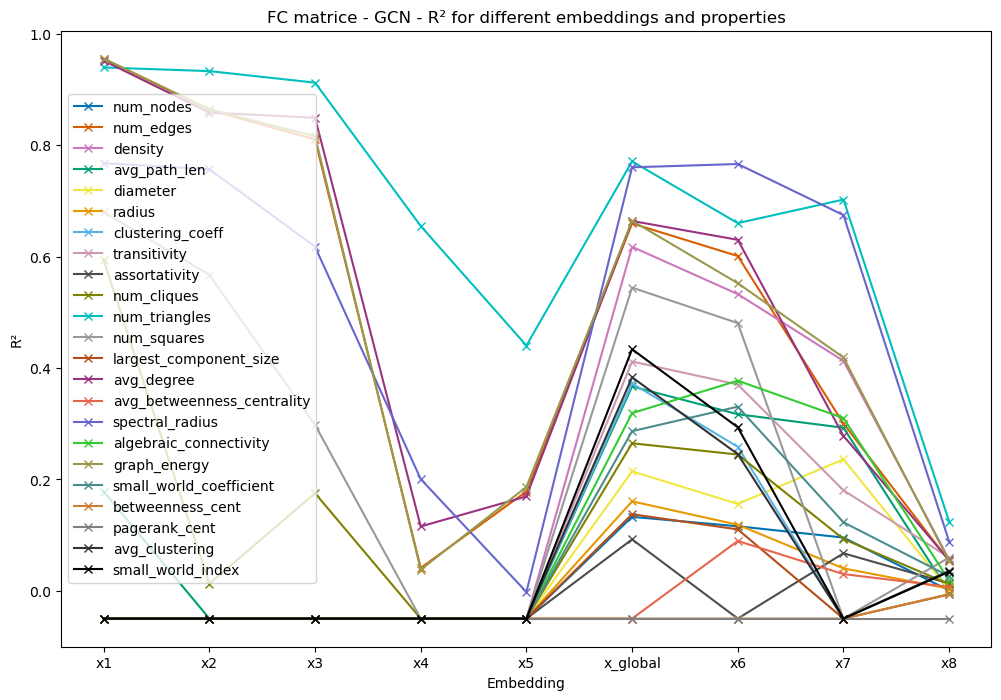

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long_random_full_embedding.png')

In [29]:
#print the R2 values in order (bigger to smaller) for x_global

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']

#sort the R2 values for x_global
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x_global', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.7710096836090088, 0.760352611541748, 0.6644264459609985, 0.6639729738235474, 0.6595465540885925, 0.6175637245178223, 0.5443196296691895, 0.43365228176116943, 0.411601722240448, 0.3832741975784302, 0.37223392724990845, 0.3668748736381531, 0.3189893960952759, 0.2865031957626343, 0.2647860646247864, 0.21438229084014893, 0.16052252054214478, 0.1373223066329956, 0.1327095627784729, 0.09221512079238892, -0.29263222217559814, -3.656663417816162, -18.528545379638672]
['num_triangles', 'spectral_radius', 'graph_energy', 'avg_degree', 'num_edges', 'density', 'num_squares', 'small_world_index', 'transitivity', 'avg_clustering', 'clustering_coeff', 'avg_path_len', 'algebraic_connectivity', 'small_world_coefficient', 'num_cliques', 'diameter', 'radius', 'largest_component_size', 'num_nodes', 'assortativity', 'avg_betweenness_centrality', 'pagerank_cent', 'betweenness_cent']


In [30]:
#same for x6
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

#sort the R2 values for x6
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x6', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.7662670016288757, 0.6600982546806335, 0.6301581859588623, 0.6010440587997437, 0.5522460341453552, 0.5327057838439941, 0.4805904030799866, 0.37718427181243896, 0.37031805515289307, 0.33049559593200684, 0.3169630169868469, 0.2935062050819397, 0.2584749460220337, 0.24528884887695312, 0.2445940375328064, 0.15593963861465454, 0.11848163604736328, 0.11576563119888306, 0.11018812656402588, 0.08930999040603638, -0.12845444679260254, -1.3283343315124512, -4.546452045440674]
['spectral_radius', 'num_triangles', 'avg_degree', 'num_edges', 'graph_energy', 'density', 'num_squares', 'algebraic_connectivity', 'transitivity', 'small_world_coefficient', 'avg_path_len', 'small_world_index', 'clustering_coeff', 'avg_clustering', 'num_cliques', 'diameter', 'radius', 'num_nodes', 'largest_component_size', 'avg_betweenness_centrality', 'assortativity', 'pagerank_cent', 'betweenness_cent']


In [31]:
#same for x7

#sort the R2 values for x7
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x7', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.7024461030960083, 0.6745524406433105, 0.41892844438552856, 0.41274768114089966, 0.3100341558456421, 0.3002154231071472, 0.29269611835479736, 0.27806413173675537, 0.2359040379524231, 0.18035876750946045, 0.12293350696563721, 0.09548807144165039, 0.09287458658218384, 0.06726813316345215, 0.040152013301849365, 0.029901206493377686, -0.09614801406860352, -0.20595157146453857, -0.26530301570892334, -0.2692807912826538, -0.42156505584716797, -3.4007840156555176, -4.644497871398926]
['num_triangles', 'spectral_radius', 'graph_energy', 'density', 'algebraic_connectivity', 'num_edges', 'avg_path_len', 'avg_degree', 'diameter', 'transitivity', 'small_world_coefficient', 'num_nodes', 'num_cliques', 'assortativity', 'radius', 'avg_betweenness_centrality', 'largest_component_size', 'num_squares', 'avg_clustering', 'clustering_coeff', 'small_world_index', 'pagerank_cent', 'betweenness_cent']


In [32]:
#same for x8

#sort the R2 values for x8
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x8', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.12421733140945435, 0.08838951587677002, 0.059639036655426025, 0.05956381559371948, 0.05619865655899048, 0.05474907159805298, 0.0531010627746582, 0.053100764751434326, 0.03540307283401489, 0.035393595695495605, 0.03416544198989868, 0.02591860294342041, 0.018880605697631836, 0.013146460056304932, 0.012087702751159668, 0.007021784782409668, 0.0036957859992980957, 0.0014702677726745605, 0.000486910343170166, -0.0023196935653686523, -0.006069660186767578, -0.00662994384765625, -0.05027735233306885]
['num_triangles', 'spectral_radius', 'transitivity', 'num_squares', 'density', 'avg_degree', 'graph_energy', 'num_edges', 'clustering_coeff', 'avg_clustering', 'small_world_index', 'small_world_coefficient', 'algebraic_connectivity', 'assortativity', 'num_cliques', 'avg_betweenness_centrality', 'radius', 'diameter', 'num_nodes', 'avg_path_len', 'betweenness_cent', 'largest_component_size', 'pagerank_cent']


# Node embedding probing

/!\ Try to not forget that we need to change the batch_size to 1 if we want to probe for node properties as we need the forward pass to be made 1 graph by 1 graph at a time. 

In [33]:
dataset = read_dataset_MDD()
import torch
torch.manual_seed(37)
MODEL = "GIN"
DATASET = "FC_MDD"
from models.models_FC import GIN_framework as framework # import the model
gnn = framework(dataset)
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt", map_location='cpu')
gnn.evaluate()

c:\Users\tomdu\miniconda3\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Test Loss: 1.728, Train Acc: 0.970 Test Acc: 0.642


## Node Properties 

In [ ]:
import networkx as nx
import torch

def compute_node_properties(data, indices):
    properties = []
    for idx in indices:
        graph_data = data[idx]
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Add all nodes to the graph to handle disconnected nodes
        all_nodes = set(range(len(graph_data.x)))
        connected_nodes = set(G.nodes())
        disconnected_nodes = all_nodes - connected_nodes
        
        # Calculate node properties using NetworkX for connected nodes
        degree = dict(G.degree())
        clustering = nx.clustering(G)
        betweenness = nx.betweenness_centrality(G)
        closeness = nx.closeness_centrality(G)
        eigenvector = nx.eigenvector_centrality(G, max_iter=10000)
        pagerank = nx.pagerank(G)

        # Initialize properties with zeros for all nodes
        node_properties = [{'degree': 0, 'clustering': 0, 'betweenness': 0, 'closeness': 0, 'eigenvector': 0, 'pagerank': 0} for _ in all_nodes]
        
        # Store properties for each connected node in the graph
        for node in connected_nodes:
            node_properties[node] = {
                'degree': degree[node],
                'clustering': clustering[node],
                'betweenness': betweenness[node],
                'closeness': closeness[node],
                'eigenvector': eigenvector[node],
                'pagerank': pagerank[node]
            }

        #if there a disconnected nodes : print 
        # if disconnected_nodes:
        #     print(f"Graph {idx}: Disconnected nodes: {disconnected_nodes}")
        #     print(node_properties)

        properties.append(node_properties)
    return properties

# Ensure gnn.train_idx and gnn.test_idx are lists of integers
train_idx = gnn.train_idx.tolist() if isinstance(gnn.train_idx, torch.Tensor) else gnn.train_idx
test_idx = gnn.test_idx.tolist() if isinstance(gnn.test_idx, torch.Tensor) else gnn.test_idx

# Compute node-level properties for train and test sets
train_node_properties = compute_node_properties(gnn.dataset, train_idx)
test_node_properties = compute_node_properties(gnn.dataset, test_idx)


## Features

In [ ]:
train_features, test_features = gnn.evaluate_with_features2(return_node_embeddings=True)

In [ ]:
len(train_features), len(test_features)

In [ ]:
# Check the shape of the first graph's features
first_graph_features = train_features[1]
for i, feature in enumerate(first_graph_features):
    print(f"Feature {i+1} shape:", feature.shape)

In [ ]:
train_features[1][0][115]

In [ ]:
print(len(train_features))
print(len(train_features[0]))
print(train_features[0][0].shape)

In [ ]:
print(len(train_node_properties))
print(len(train_node_properties[0]))
print(train_node_properties[0][0])

## Linear classifier

**Probe**

Example data structure for multiple graphs

train_features: List of graphs, each with multiple layers of features

```plaintext
train_features = [
    [np.array([...]), np.array([...]), ...],  # Graph 1: features for each layer
    [np.array([...]), np.array([...]), ...],  # Graph 2: features for each layer
    ...
]
```
train_node_properties: List of graphs, each with a list of node properties

```plaintext
train_node_properties = [
    [{'degree': ..., 'clustering': ..., ...}, {'degree': ..., ...}, ...],  # Graph 1: properties for each node
    [{'degree': ..., 'clustering': ..., ...}, {'degree': ..., ...}, ...],  # Graph 2: properties for each node
    ...
]
```
test_features and test_node_properties would be similarly structured for the test set

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class LinearModel(nn.Module):
    def __init__(self, input_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
def train_probe_for_layer(features, property_values, test_features, test_property_values, num_epochs=10000, learning_rate=0.01):
    # Convert features and property values to PyTorch tensors if they are NumPy arrays
    if isinstance(features, np.ndarray):
        features = torch.tensor(features, dtype=torch.float32)
    if isinstance(property_values, np.ndarray):
        property_values = torch.tensor(property_values, dtype=torch.float32)

    if isinstance(test_features, np.ndarray):
        test_features = torch.tensor(test_features, dtype=torch.float32)
    if isinstance(test_property_values, np.ndarray):
        test_property_values = torch.tensor(test_property_values, dtype=torch.float32)

    print(f"Training on features with shape: {features.shape} for property values shape: {property_values.shape}")

    model = LinearModel(features.shape[1])  # Features should be 2D: (num_nodes, feature_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(features).squeeze()  # Remove single-dimensional entries
        loss = criterion(output, property_values)
        loss.backward()
        optimizer.step()

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        pred = model(test_features).squeeze()
        mse = criterion(pred, test_property_values).item()
        # Flatten the tensors for proper use of r2_score
        r2 = r2_score(test_property_values.cpu().numpy(), pred.cpu().numpy())

    return mse, r2


### Option 2: Train a Single Classifier Across All Graphs

This approach involves combining data from all graphs to train a single probe for each property across the graphs. This assumes that the properties across different graphs share some common structure that can be captured by a single model. We modify the `evaluate_layer_probes` function to aggregate features and properties across all graphs before training.

This approach results in a single probe being trained for each property at each layer, but the probe is trained on data aggregated from all graphs.

In [ ]:
def evaluate_layer_probes_across_graphs(train_features_list, test_features_list, train_properties_list, test_properties_list):
    num_layers = len(train_features_list[0])  # Assuming all graphs have the same number of layers
    results = []

    num_test_graphs = len(test_features_list)  # Number of graphs in the test set

    for layer_idx in range(num_layers):
        combined_train_features = []
        combined_test_features = []
        combined_train_properties = []
        combined_test_properties = []

        # Aggregate features and properties across all graphs
        for graph_idx in range(len(train_features_list)):
            combined_train_features.append(np.vstack(train_features_list[graph_idx][layer_idx]))

            # Use modulo to cycle through the test graphs
            test_idx = graph_idx % num_test_graphs
            combined_test_features.append(np.vstack(test_features_list[test_idx][layer_idx]))

            combined_train_properties.extend(train_properties_list[graph_idx])
            combined_test_properties.extend(test_properties_list[test_idx])

        combined_train_features = np.vstack(combined_train_features)  # Combine features across graphs
        combined_test_features = np.vstack(combined_test_features)

        # Train and evaluate probe for each property across all graphs
        for property_name in combined_train_properties[0].keys():  # Assuming all nodes have the same properties
            train_property_values = np.array([node[property_name] for node in combined_train_properties])
            test_property_values = np.array([node[property_name] for node in combined_test_properties])

            mse, r2 = train_probe_for_layer(combined_train_features, train_property_values, combined_test_features, test_property_values)
            
            results.append({
                'layer': layer_idx,
                'property': property_name,
                'mse': mse,
                'r2': r2
            })

    return results


In [ ]:
results_across_graphs = evaluate_layer_probes_across_graphs(train_features, test_features, train_node_properties, test_node_properties)

import pickle as pkl
#save the results
with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "wb") as f:
    pkl.dump(results_across_graphs, f)

In [34]:
#load the results
with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "rb") as f:
    results_across_graphs = pkl.load(f)

### Choosing Between Options:

- If our graphs are very similar in nature and you expect the relationships between node embeddings and their properties to be consistent across all graphs, **Option 2** (Single Classifier Across Graphs) will be the better choice.
  
- If our graphs are diverse, or we expect the relationships to vary significantly between graphs, *Option 1* (Separate Classifiers) might be more appropriate.

We experiment with both approaches and compare the performance to see which one gives us the best results : we decided to keep option 2

### Results:

- *Layers and Properties*: The function iterate over the layers and properties to aggregate and visualize the R² scores.
  
- *Mean R² Calculation*: The mean R² scores are calculated for each layer and property. If any R² value is below `-0.05`, it is set to `-0.05` to prevent extreme values from skewing the visualization.

- *Plotting*:
  - *Option 1 (`plot_results_per_graph`)*: Plots a separate line for each graph, allowing you to see how the R² scores vary across layers and graphs.
  - *Option 2 (`plot_results_across_graphs`)*: Plots a single line for each property, aggregating the results across all graphs. This provides a high-level view of how each property behaves across layers when considering all graphs together.
  
We decided to keep option 2 as it makes more sense. This function is designed to visualize the results from the `evaluate_layer_probes_across_graphs` function. It will plot the R² scores for each property across layers, combining the results from all graphs into single lines.


In [35]:
import pickle as pkl
import matplotlib.pyplot as plt
def plot_results_across_graphs(results):
    layers = sorted(set(result['layer'] for result in results))
    properties = sorted(set(result['property'] for result in results))
    
    plt.figure(figsize=(12, 6))  # Increase the figure size for better readability
    
    for property_name in properties:
        r2_scores = []
        for layer in layers:
            layer_results = [r for r in results if r['layer'] == layer and r['property'] == property_name]
            # Calculate mean R² score for the layer
            mean_r2 = np.mean([r['r2'] for r in layer_results])
            # Set any R² value below -0.05 to -0.05
            if mean_r2 < -0.05:
                mean_r2 = -0.05
            r2_scores.append(mean_r2)
        
        # Plot the R² scores with crosses and lines, one line per property across all graphs
        plt.plot(layers, r2_scores, marker='x', linestyle='-', label=property_name)

    plt.title('R² Scores Across Layers for Different Properties (Aggregated Across Graphs)')
    plt.xticks(layers, [f'Layer {i+1}' for i in layers])  # Set the x-axis labels to layer numbers
    plt.xlabel('Layer')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)  # Add grid for better visibility of points and lines
    plt.show()

    # Save the plot
    with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "wb") as f:
        pkl.dump(results, f)

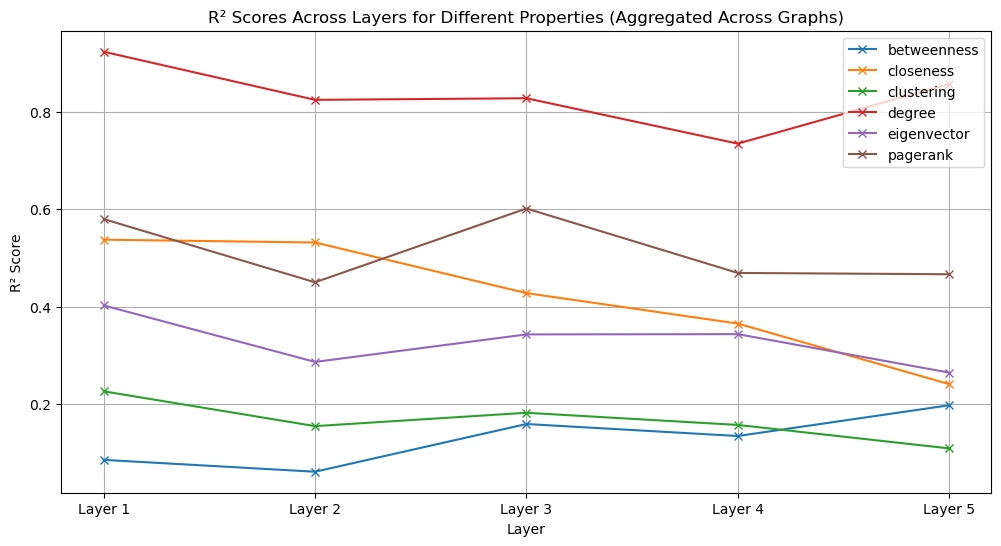

In [36]:
# Plot the results across all graphs
plot_results_across_graphs(results_across_graphs)

In [ ]:
results_across_graphs = evaluate_layer_probes_across_graphs(train_features, test_features, train_node_properties, test_node_properties)

import pickle as pkl
#save the results
with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "wb") as f:
    pkl.dump(results_across_graphs, f)

In [23]:
#load the results
with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "rb") as f:
    results_across_graphs = pkl.load(f)

### Choosing Between Options:

- If our graphs are very similar in nature and you expect the relationships between node embeddings and their properties to be consistent across all graphs, **Option 2** (Single Classifier Across Graphs) will be the better choice.
  
- If our graphs are diverse, or we expect the relationships to vary significantly between graphs, *Option 1* (Separate Classifiers) might be more appropriate.

We experiment with both approaches and compare the performance to see which one gives us the best results : we decided to keep option 2

### Results:

- *Layers and Properties*: The function iterate over the layers and properties to aggregate and visualize the R² scores.
  
- *Mean R² Calculation*: The mean R² scores are calculated for each layer and property. If any R² value is below `-0.05`, it is set to `-0.05` to prevent extreme values from skewing the visualization.

- *Plotting*:
  - *Option 1 (`plot_results_per_graph`)*: Plots a separate line for each graph, allowing you to see how the R² scores vary across layers and graphs.
  - *Option 2 (`plot_results_across_graphs`)*: Plots a single line for each property, aggregating the results across all graphs. This provides a high-level view of how each property behaves across layers when considering all graphs together.
  
We decided to keep option 2 as it makes more sense. This function is designed to visualize the results from the `evaluate_layer_probes_across_graphs` function. It will plot the R² scores for each property across layers, combining the results from all graphs into single lines.


In [24]:
import pickle as pkl
import matplotlib.pyplot as plt
def plot_results_across_graphs(results):
    layers = sorted(set(result['layer'] for result in results))
    properties = sorted(set(result['property'] for result in results))
    
    plt.figure(figsize=(12, 6))  # Increase the figure size for better readability
    
    for property_name in properties:
        r2_scores = []
        for layer in layers:
            layer_results = [r for r in results if r['layer'] == layer and r['property'] == property_name]
            # Calculate mean R² score for the layer
            mean_r2 = np.mean([r['r2'] for r in layer_results])
            # Set any R² value below -0.05 to -0.05
            if mean_r2 < -0.05:
                mean_r2 = -0.05
            r2_scores.append(mean_r2)
        
        # Plot the R² scores with crosses and lines, one line per property across all graphs
        plt.plot(layers, r2_scores, marker='x', linestyle='-', label=property_name)

    plt.title('R² Scores Across Layers for Different Properties (Aggregated Across Graphs)')
    plt.xticks(layers, [f'Layer {i+1}' for i in layers])  # Set the x-axis labels to layer numbers
    plt.xlabel('Layer')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)  # Add grid for better visibility of points and lines
    plt.show()

    # Save the plot
    with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "wb") as f:
        pkl.dump(results, f)

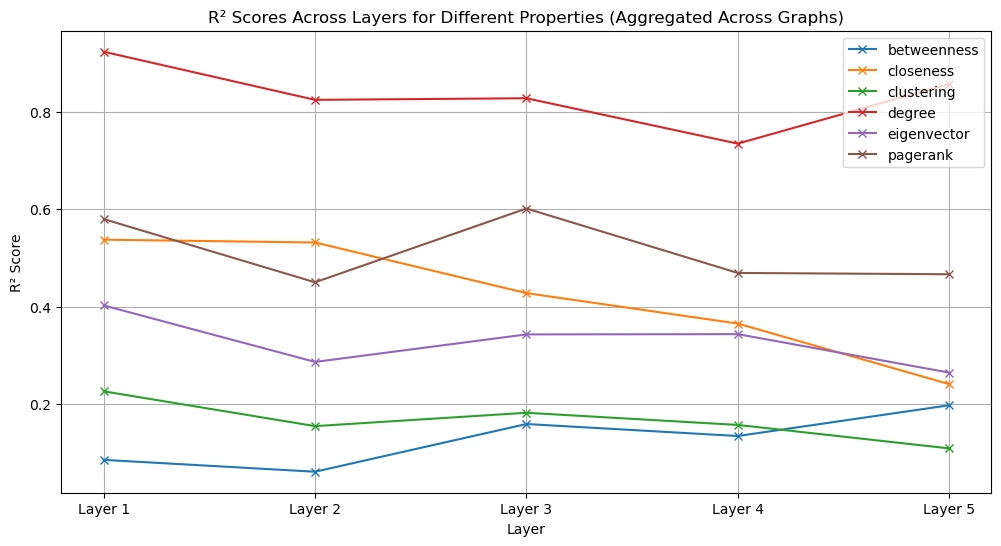

In [25]:
# Plot the results across all graphs
plot_results_across_graphs(results_across_graphs)

In [26]:
# Identify unique layers
layers = set(result['layer'] for result in results_across_graphs)

for layer in layers:
    # Filter results for the current layer
    layer_results = [result for result in results_across_graphs if result['layer'] == layer]
    
    # Extract and sort r2 values along with property names in descending order
    sorted_r2_values = sorted([(result['r2'], result['property']) for result in layer_results], reverse=True, key=lambda x: x[0])
    
    # Print the sorted r2 values with property names for the current layer
    print(f"Layer {layer}:")
    for r2, property in sorted_r2_values:
        print(f"  Property: {property}, R2: {r2}")
    print()  # Add a blank line for better readability

Layer 0:
  Property: degree, R2: 0.9228083491325378
  Property: pagerank, R2: 0.5797159671783447
  Property: closeness, R2: 0.5374410152435303
  Property: eigenvector, R2: 0.40267330408096313
  Property: clustering, R2: 0.22653961181640625
  Property: betweenness, R2: 0.0860101580619812

Layer 1:
  Property: degree, R2: 0.8241395950317383
  Property: closeness, R2: 0.531728982925415
  Property: pagerank, R2: 0.45005255937576294
  Property: eigenvector, R2: 0.2867937684059143
  Property: clustering, R2: 0.15518569946289062
  Property: betweenness, R2: 0.06169247627258301

Layer 2:
  Property: degree, R2: 0.8274109959602356
  Property: pagerank, R2: 0.6013488173484802
  Property: closeness, R2: 0.42786186933517456
  Property: eigenvector, R2: 0.3432214856147766
  Property: clustering, R2: 0.18254071474075317
  Property: betweenness, R2: 0.1595025658607483

Layer 3:
  Property: degree, R2: 0.7343670129776001
  Property: pagerank, R2: 0.46925604343414307
  Property: closeness, R2: 0.365462